In [16]:
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from scipy import stats
import numpy as np
from scipy.stats import skew, boxcox

In [18]:
warnings.filterwarnings('ignore')
dir = "C:/Users/pc/Downloads/ai-level1/house-prices"

In [20]:
house_train = pd.read_csv(os.path.join(dir, "train.csv"))
house_train.shape
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
def cont_selector(df):
    return df.select_dtypes(include=['number']).columns

def cat_selector(df):
    return df.select_dtypes(exclude=['number']).columns

def cast_to_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

In [22]:
print(cont_selector(house_train))
print(cat_selector(house_train))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

In [23]:
features_to_cast = ["MSSubClass"]
features_to_cast.extend(cat_selector(house_train))
cast_to_cat(house_train, features_to_cast)
print(cont_selector(house_train))
print(cat_selector(house_train))

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', '

In [24]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [25]:
def plot_missing_data(df):
    counts = df.isnull().sum()
    per = counts/float(df.shape[0])
    df_missing = pd.DataFrame({'feature':counts.index, 'MissingValuePercent':per})
    df_missing.sort_values(by=['MissingValuePercent'], ascending=True, inplace=True)
    df_missing.set_index('feature', inplace=True)
    df_missing.plot(kind='barh', figsize=(25, 25))

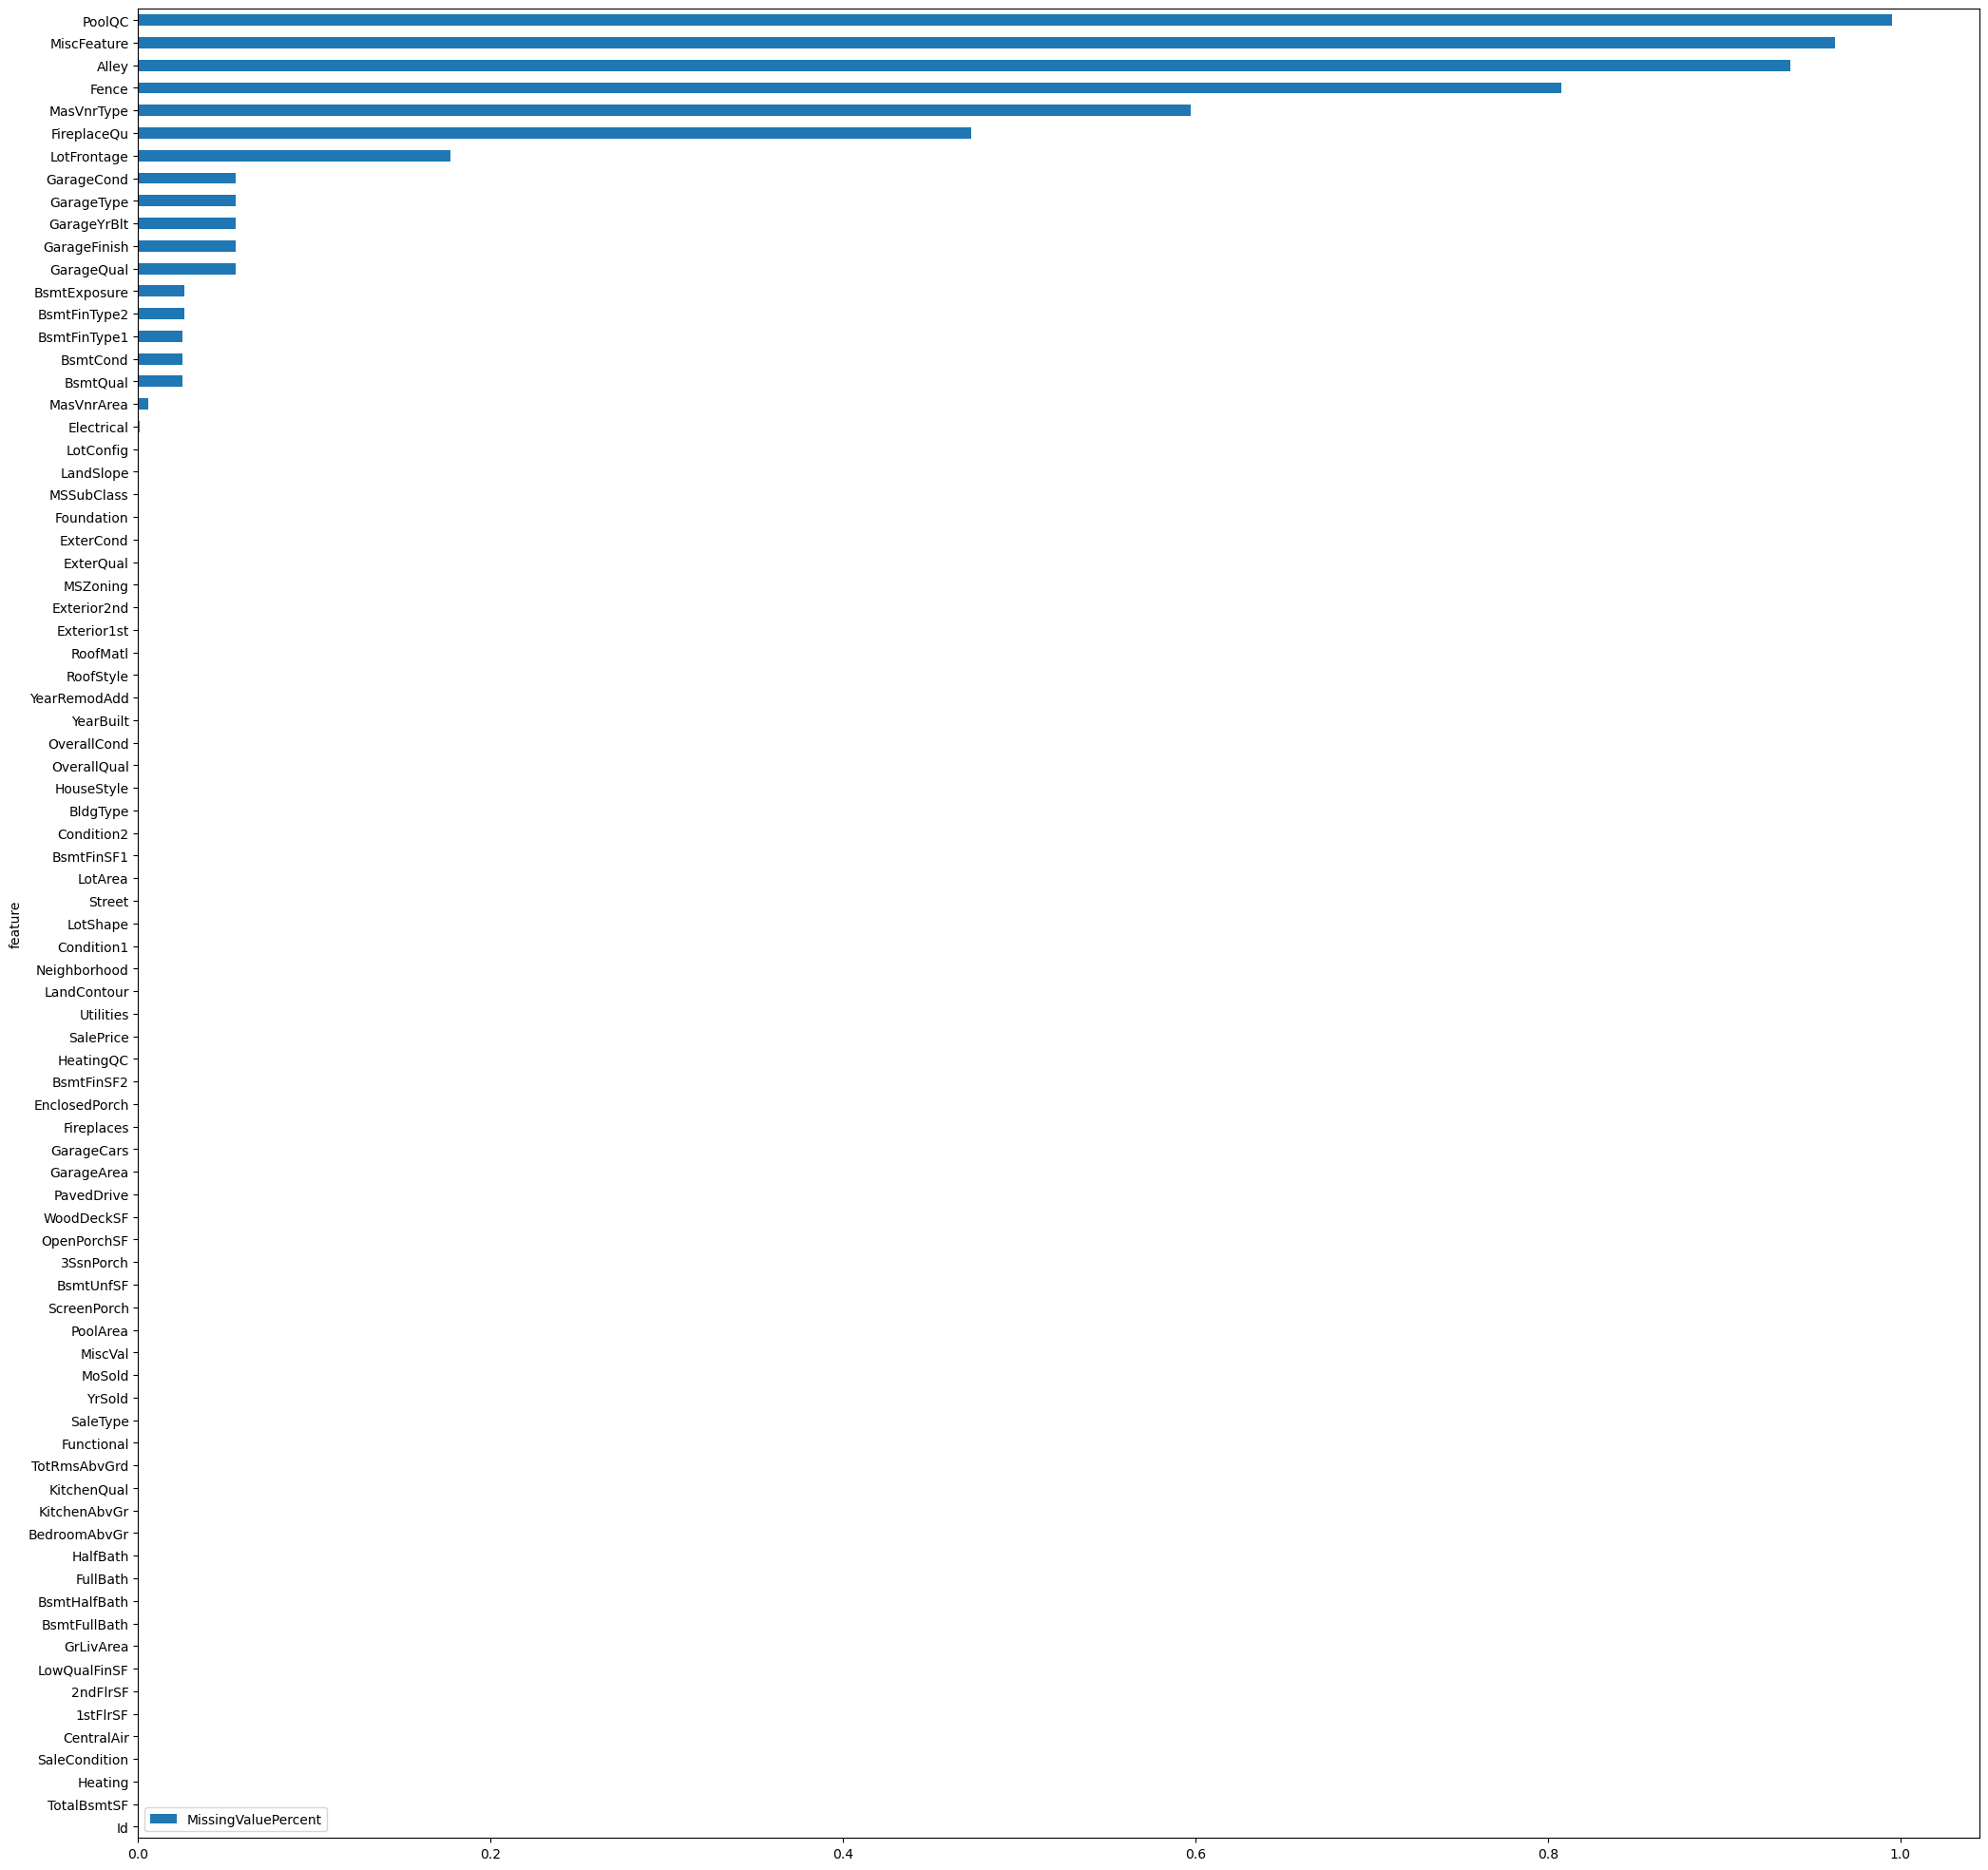

In [26]:
plot_missing_data(house_train)

In [27]:
# explore target variable
house_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

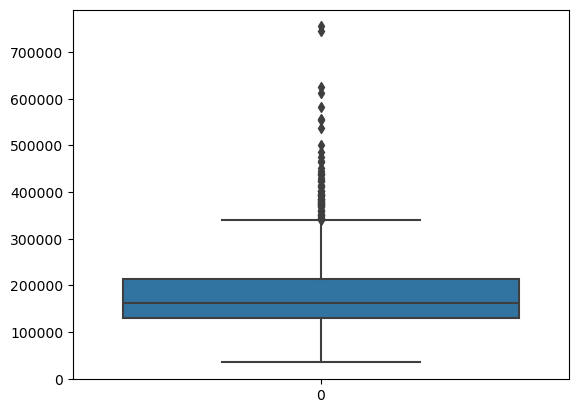

In [28]:
sns.boxplot(house_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

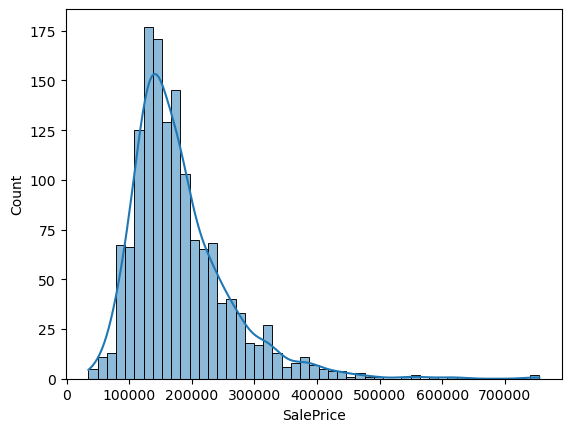

In [29]:
sns.histplot(house_train['SalePrice'], kde=True)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


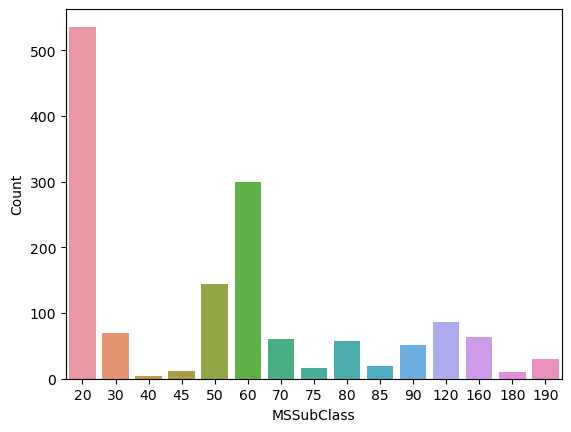

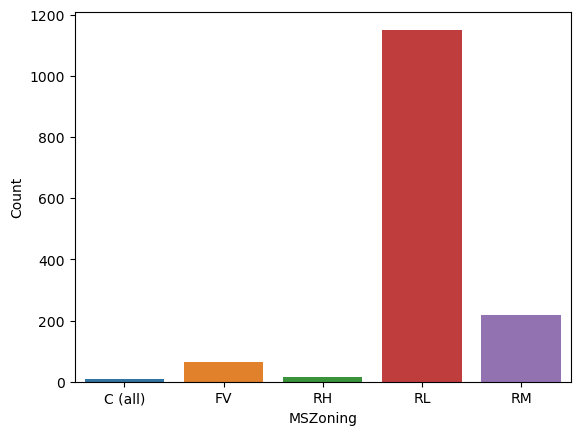

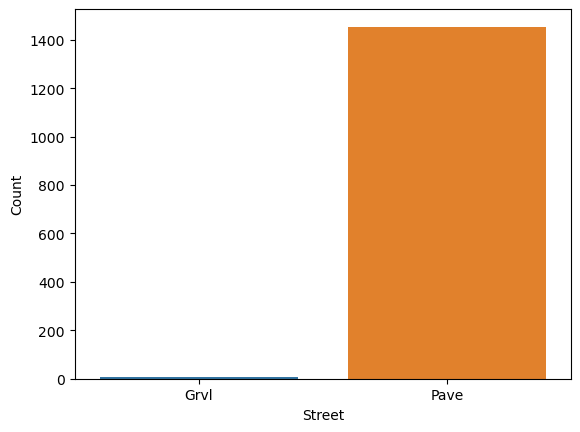

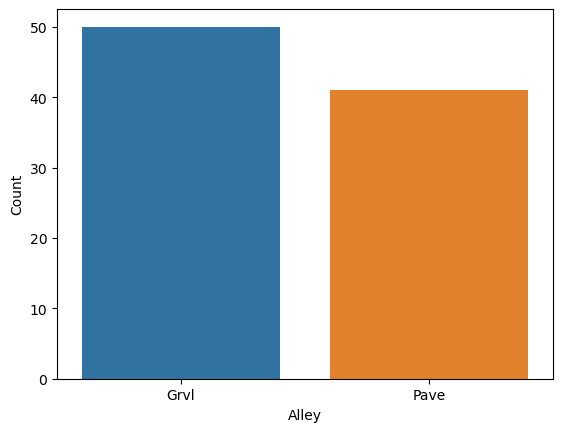

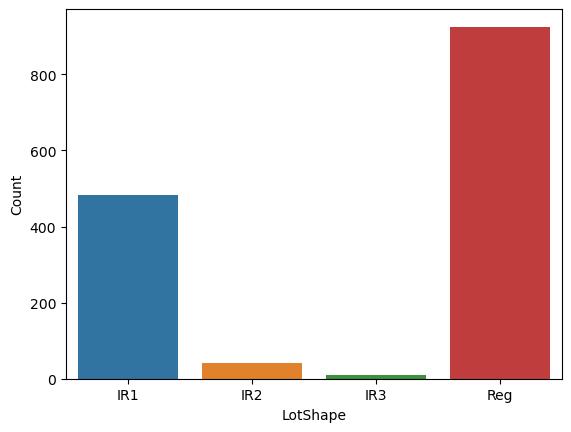

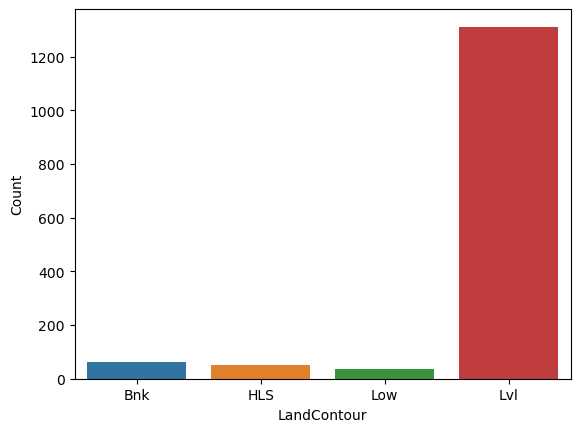

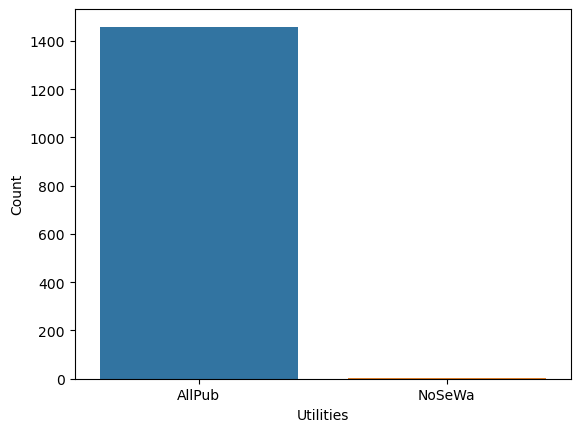

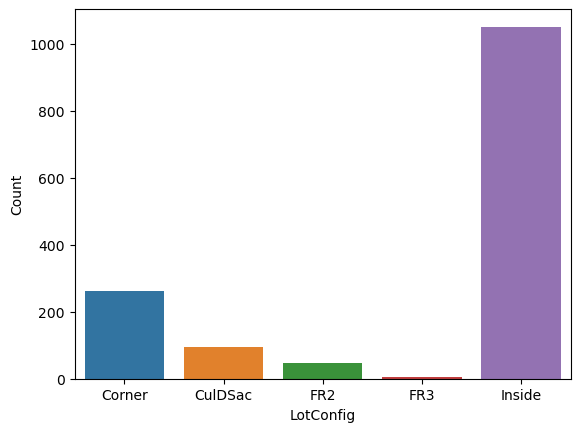

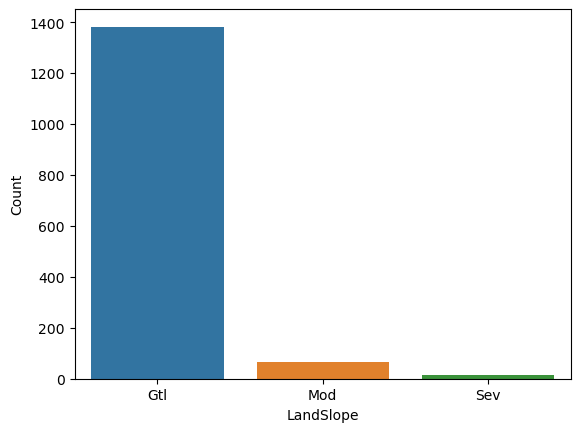

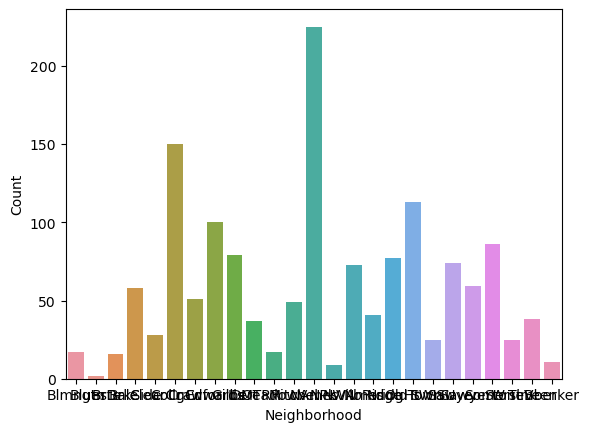

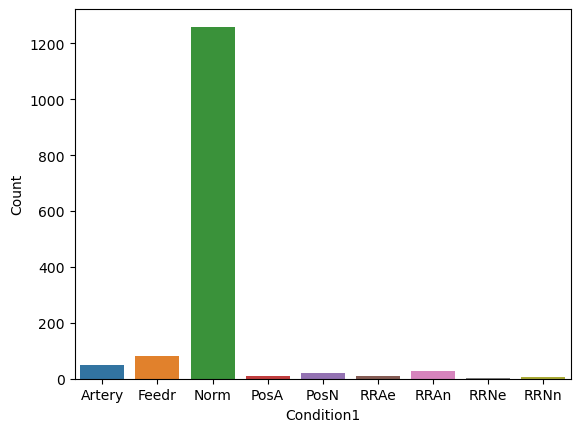

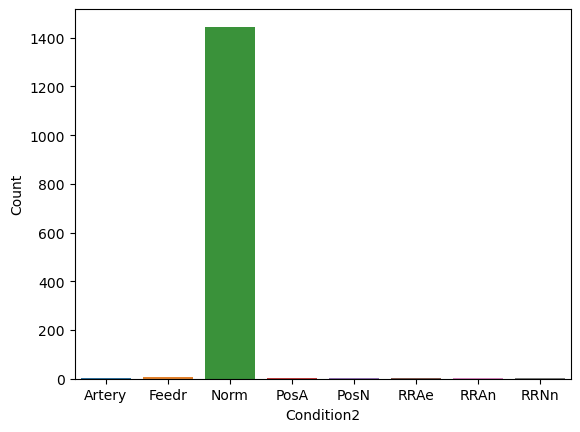

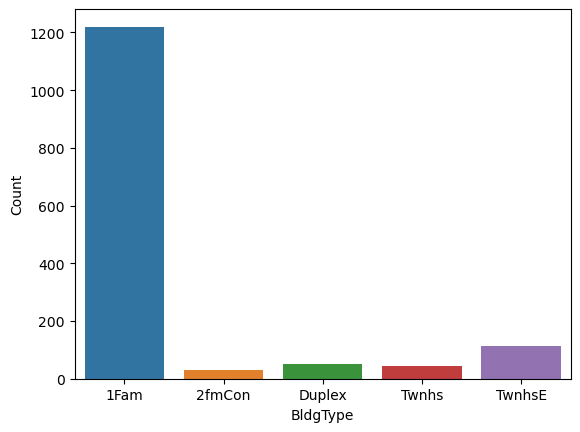

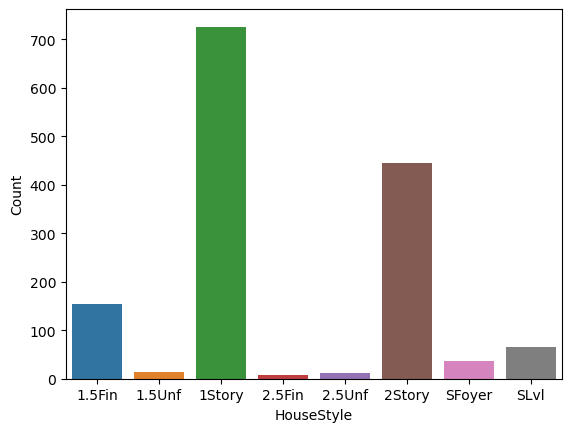

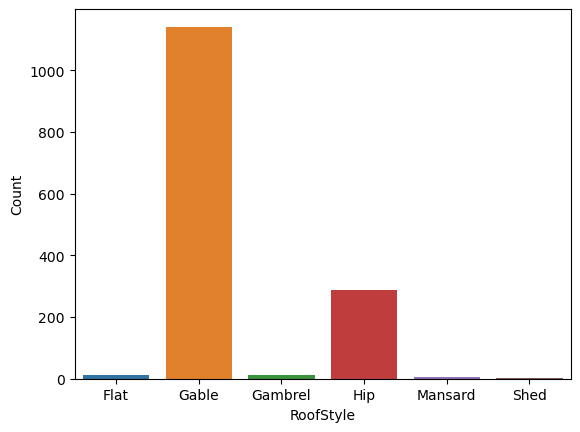

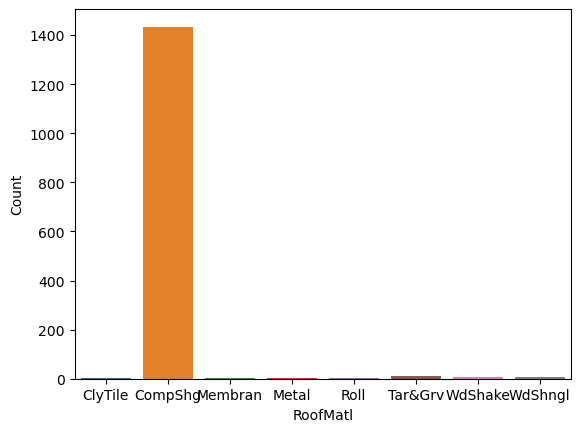

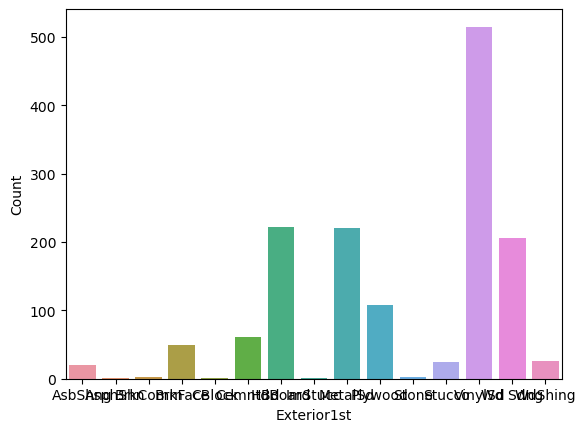

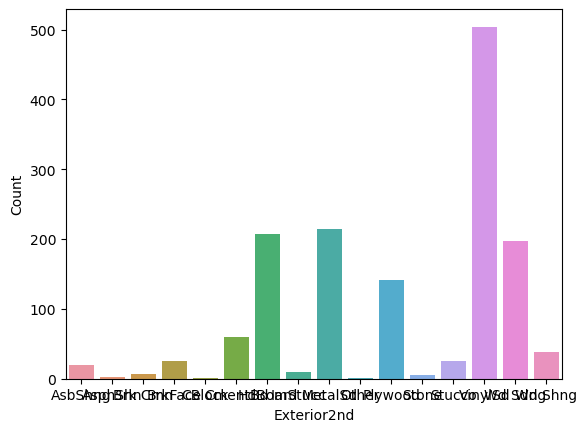

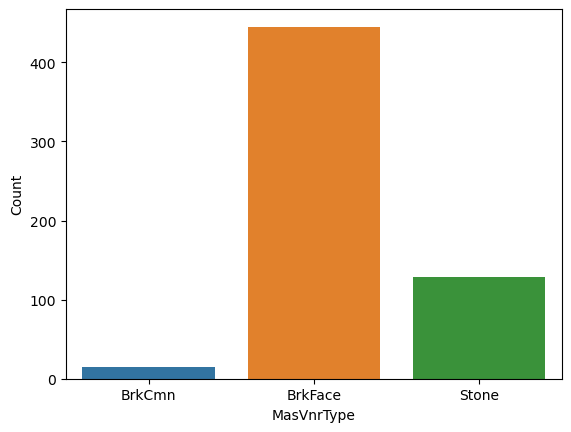

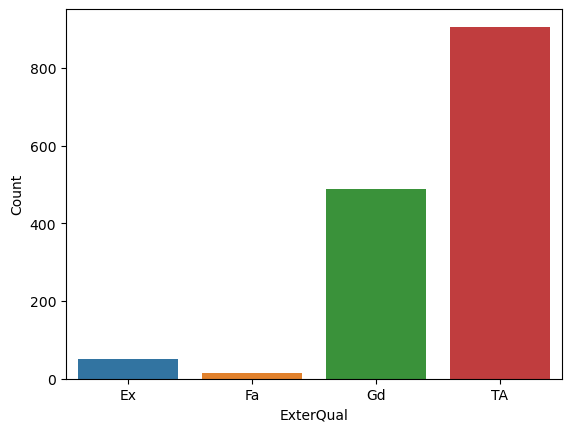

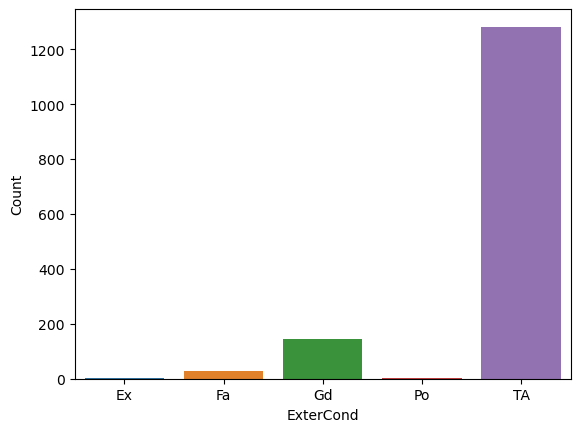

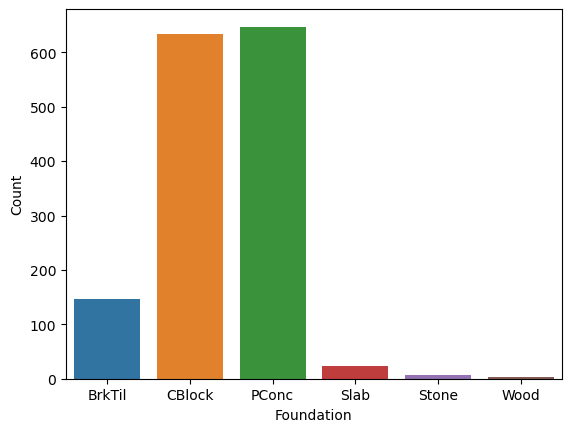

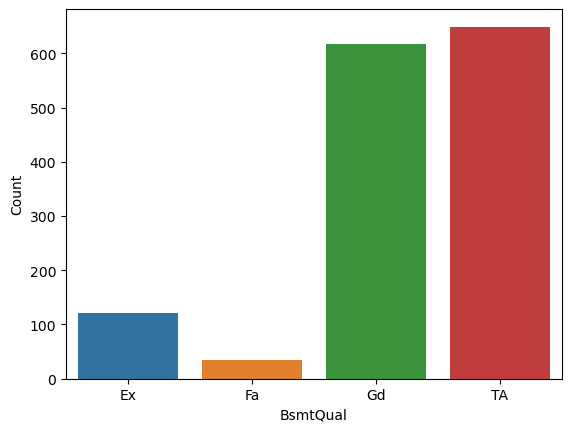

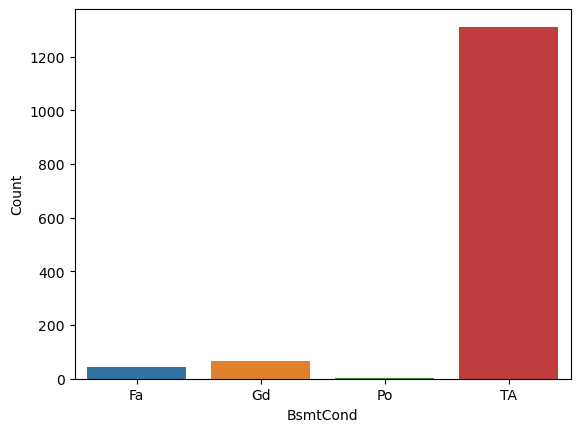

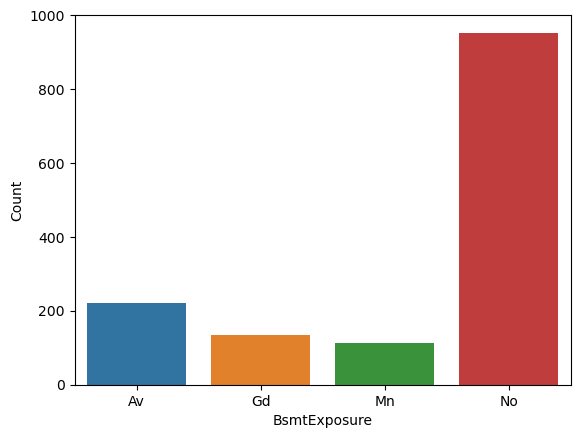

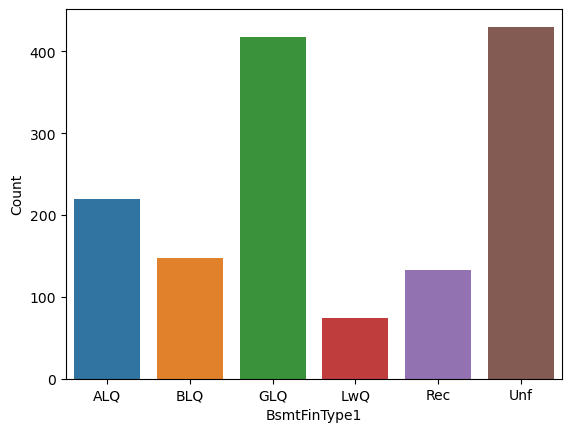

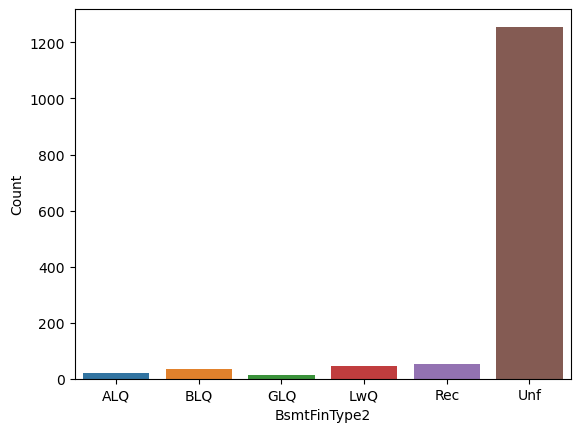

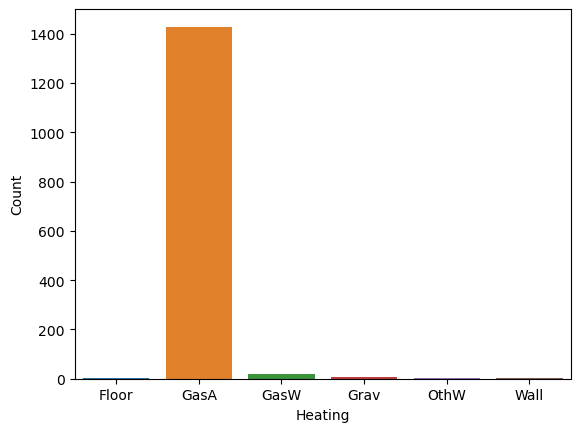

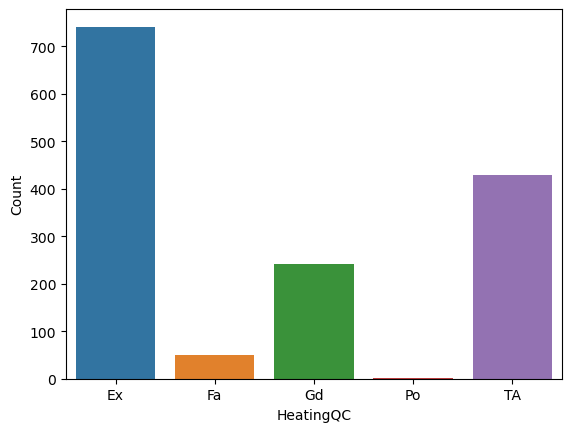

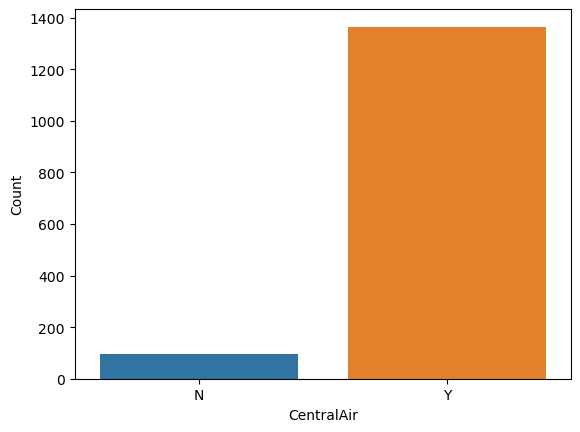

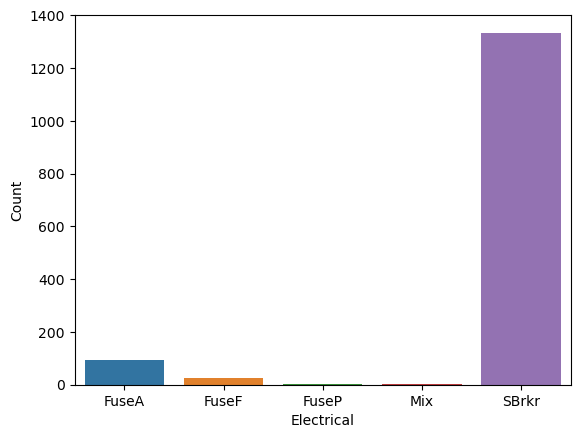

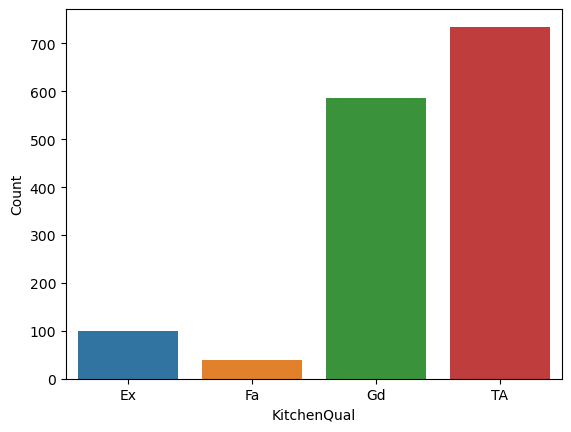

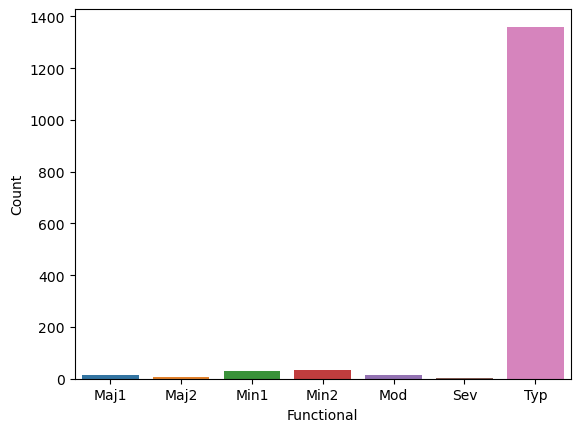

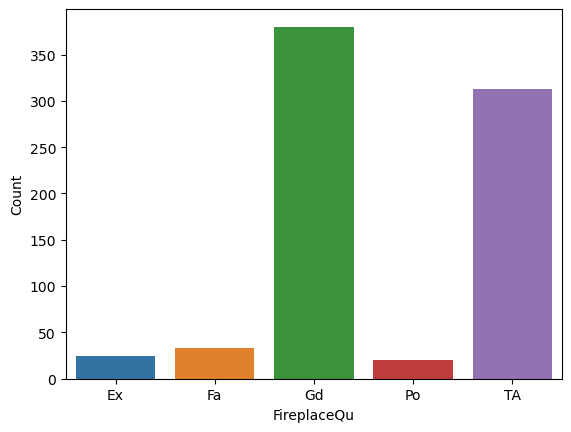

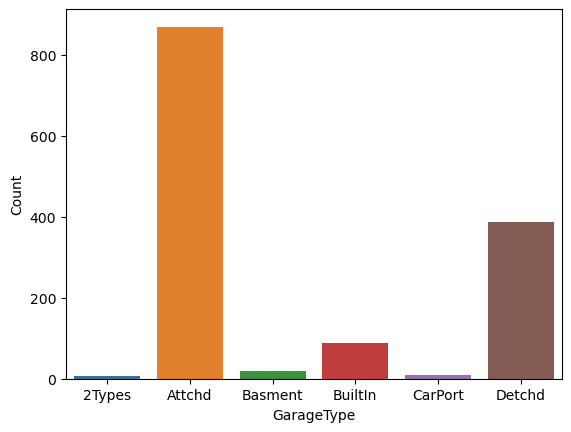

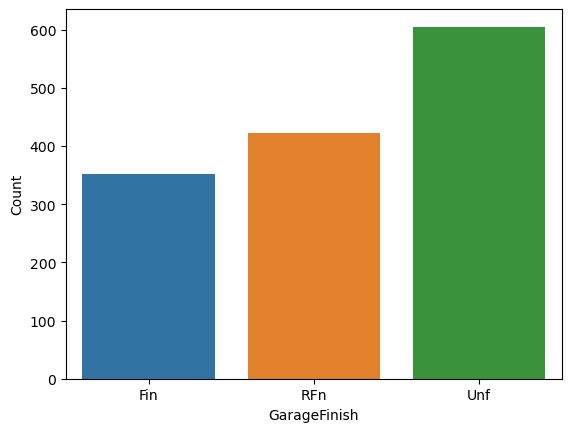

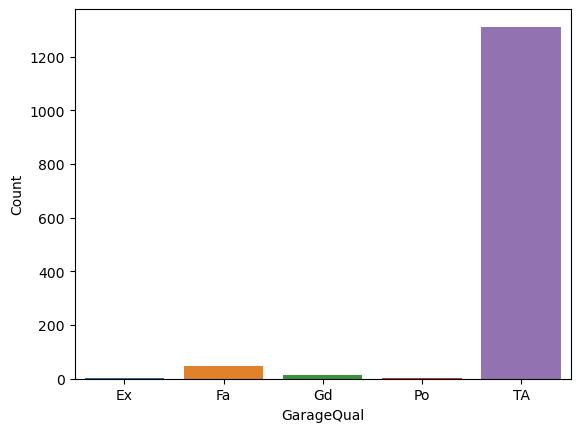

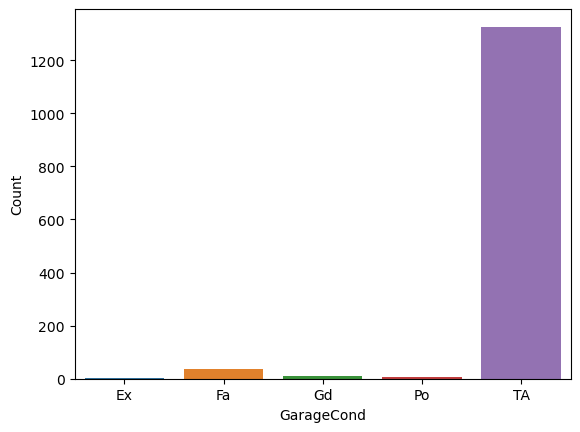

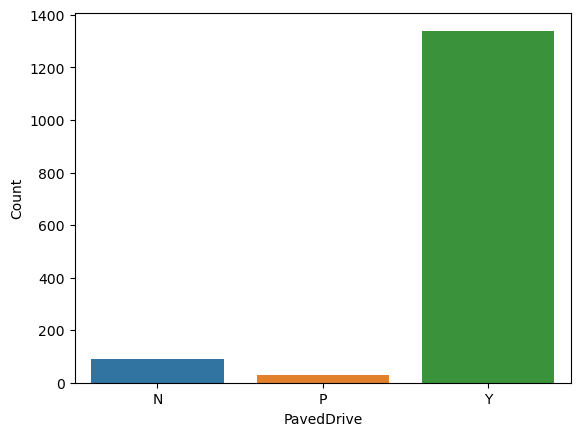

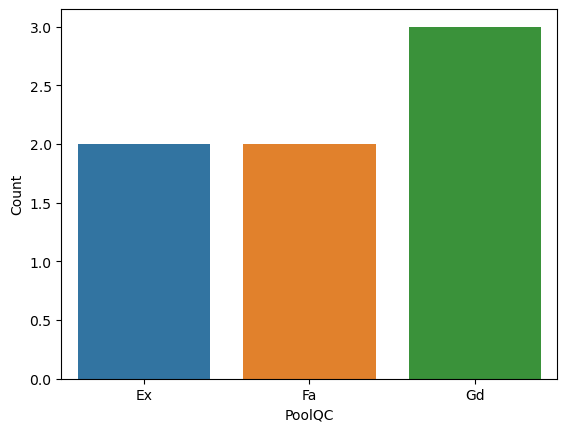

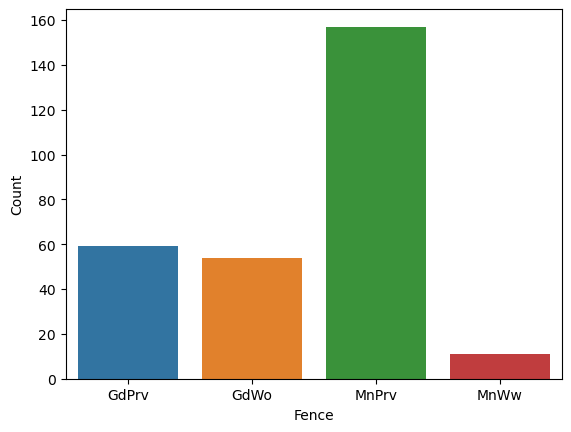

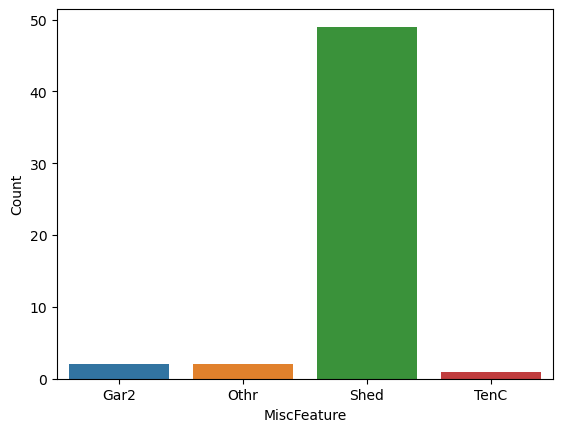

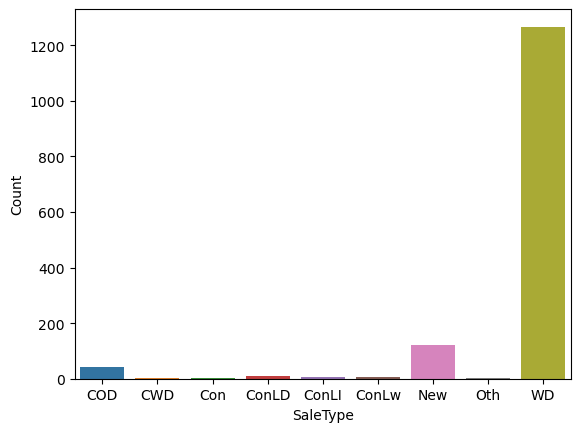

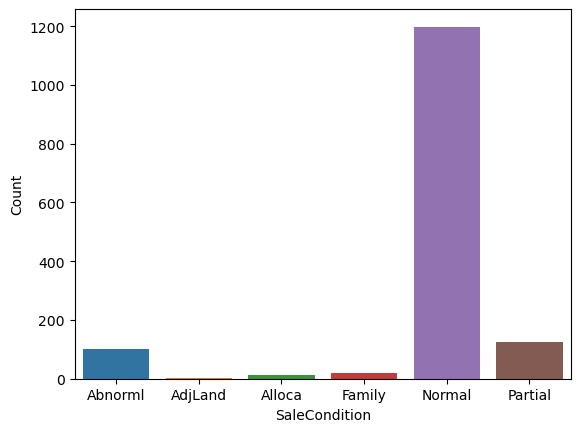

In [30]:
#Explore categorical features
cat_features = cat_selector(house_train)
print(cat_features)
for feature in cat_features:
    sns.countplot(x=feature,data=house_train)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

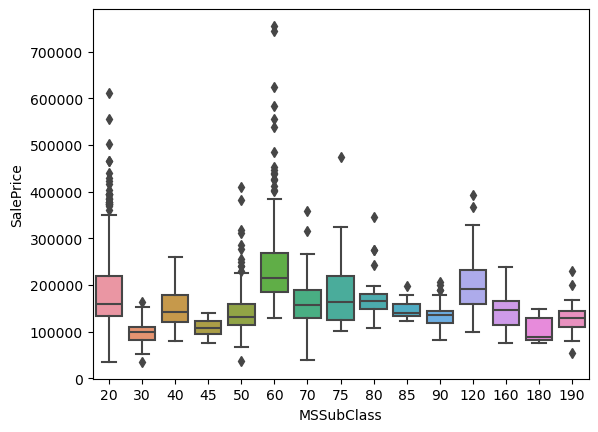

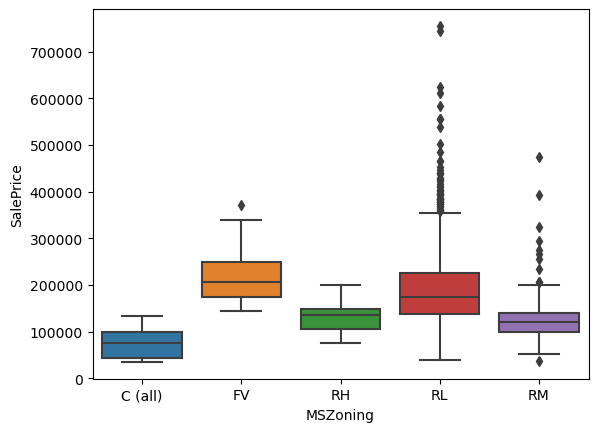

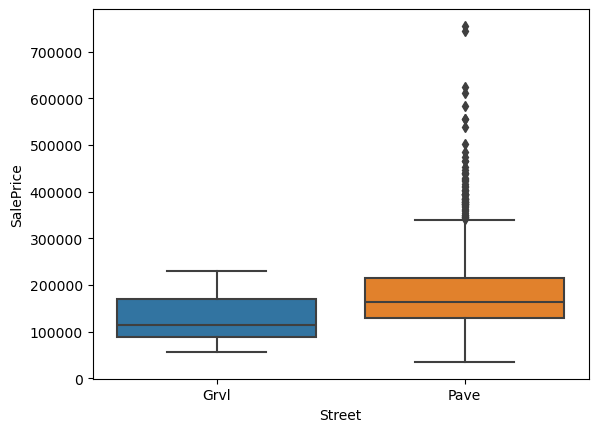

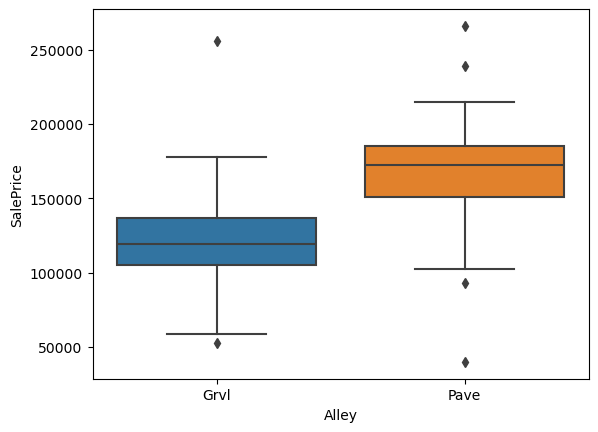

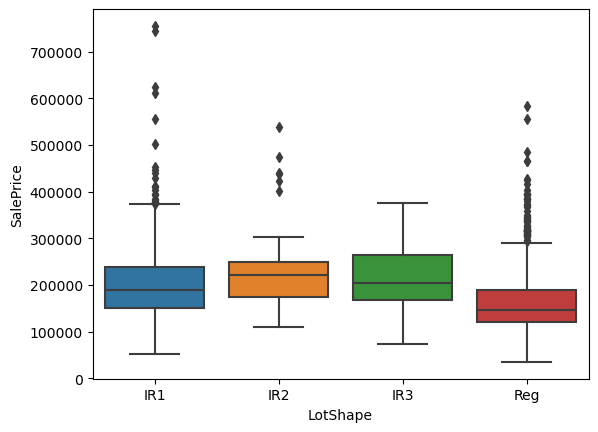

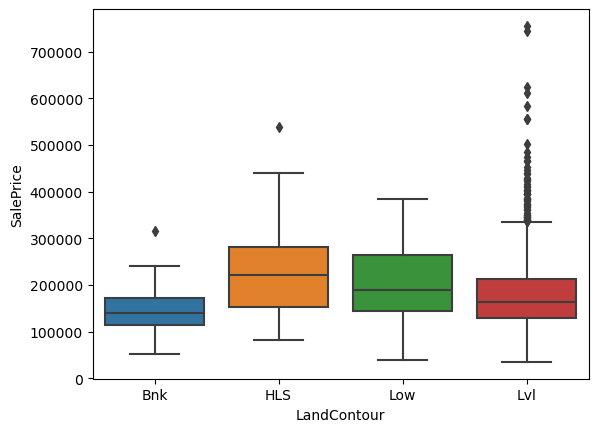

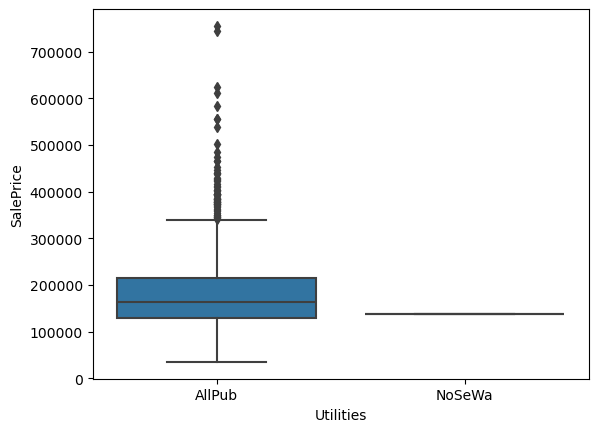

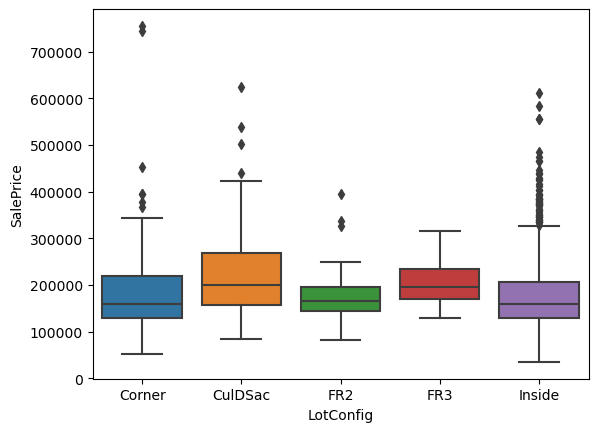

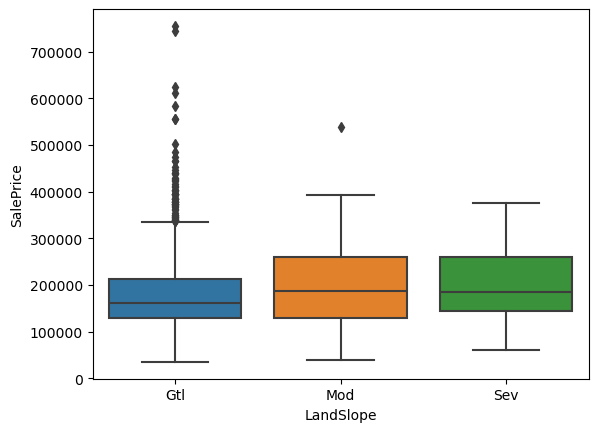

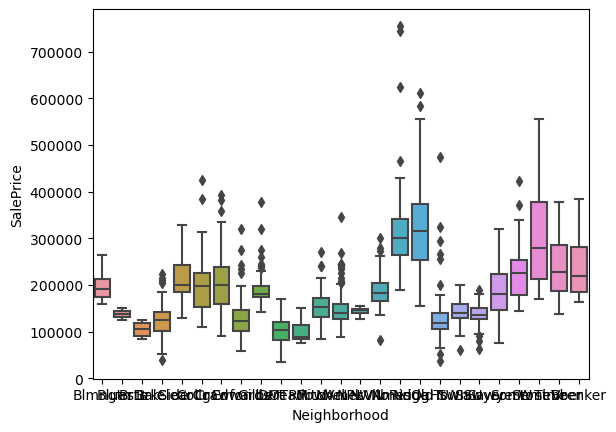

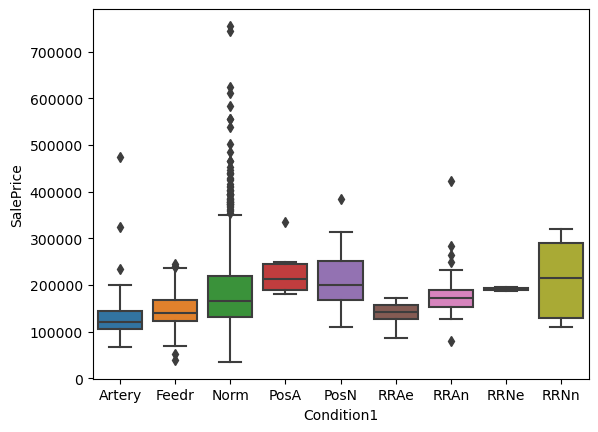

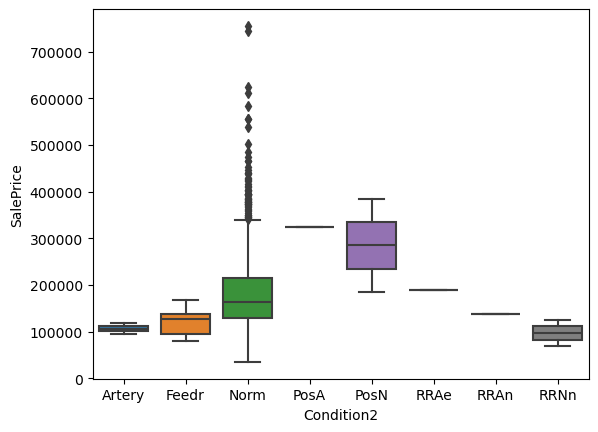

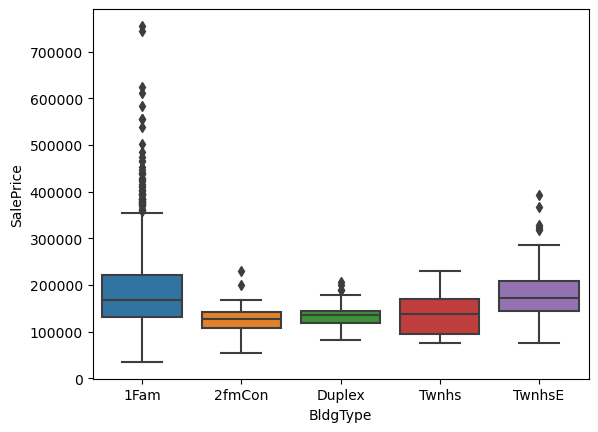

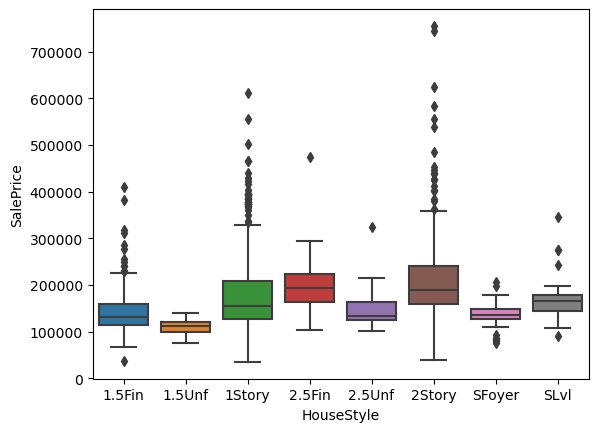

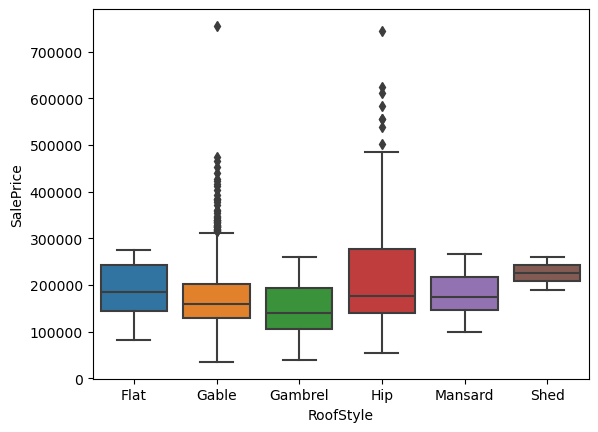

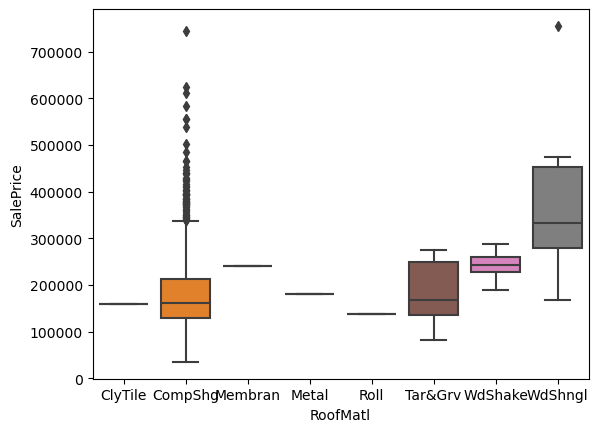

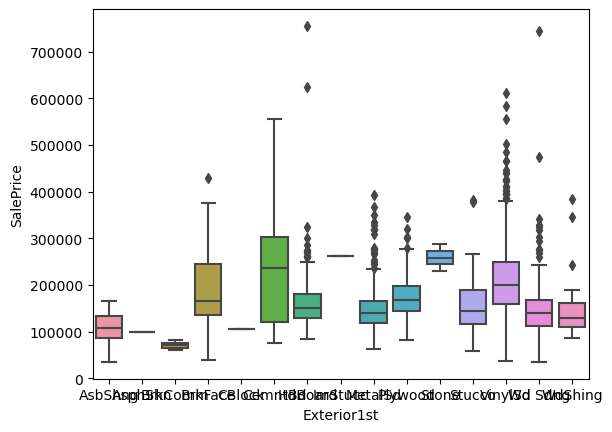

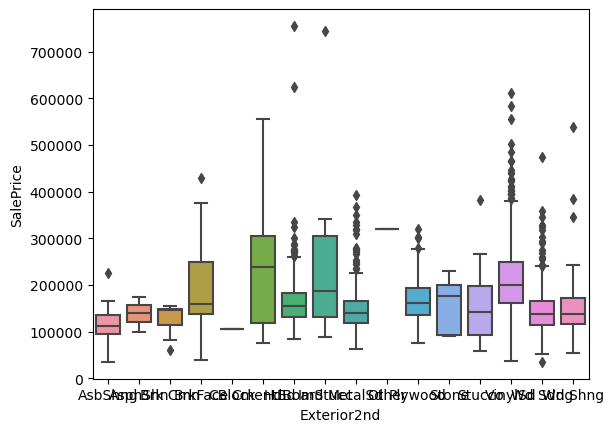

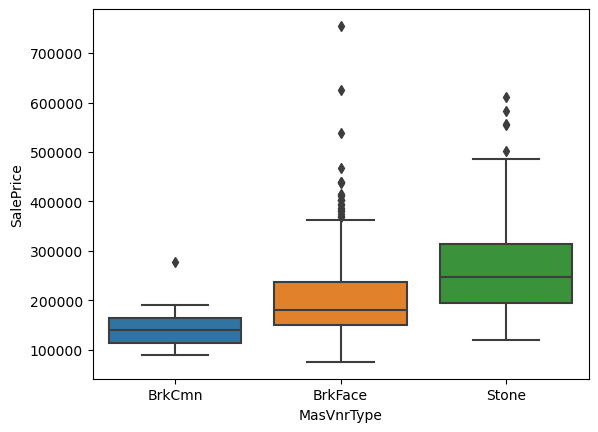

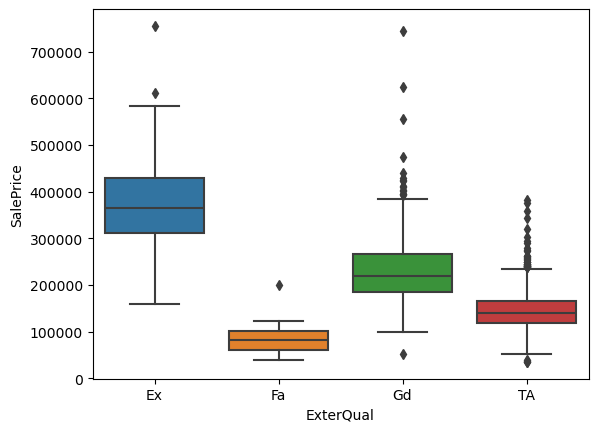

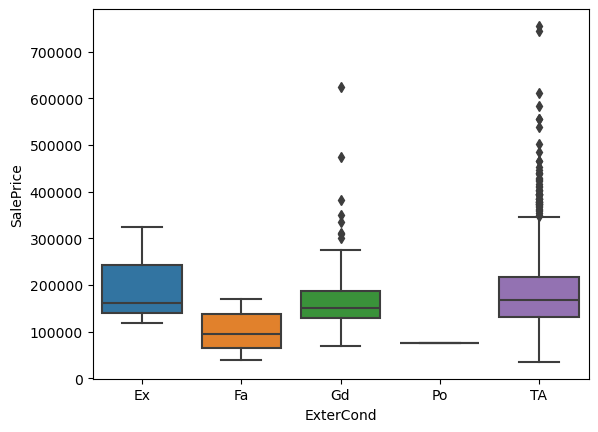

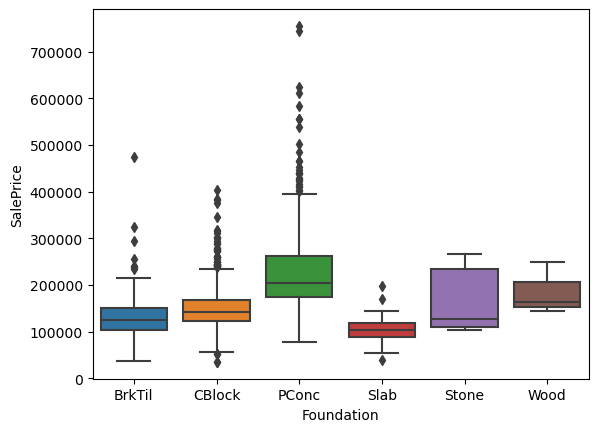

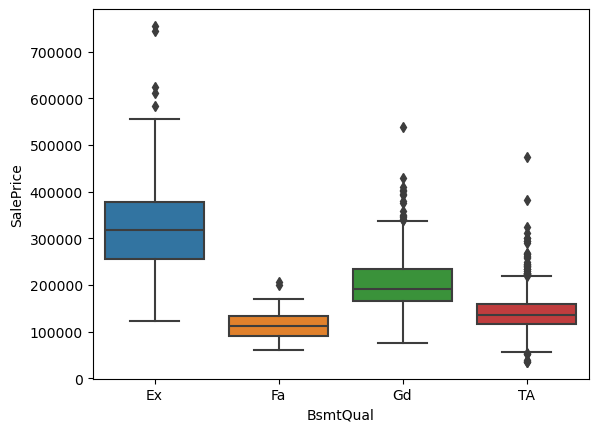

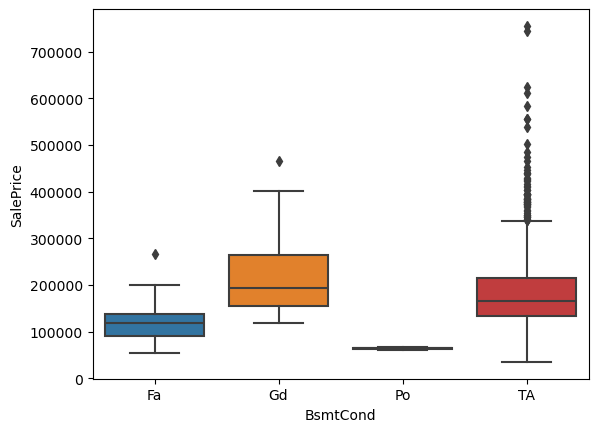

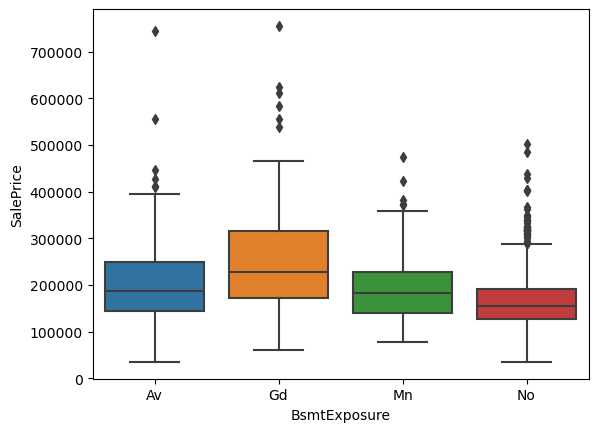

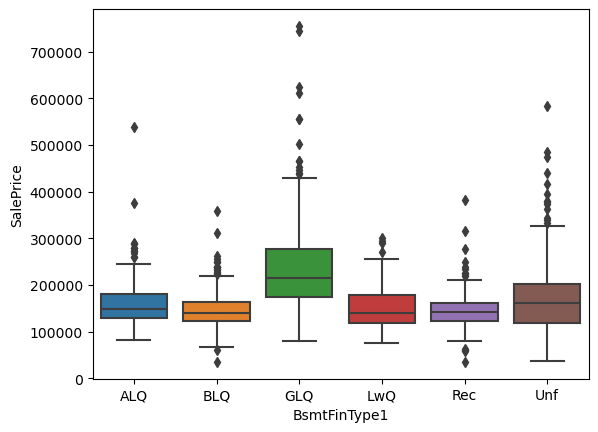

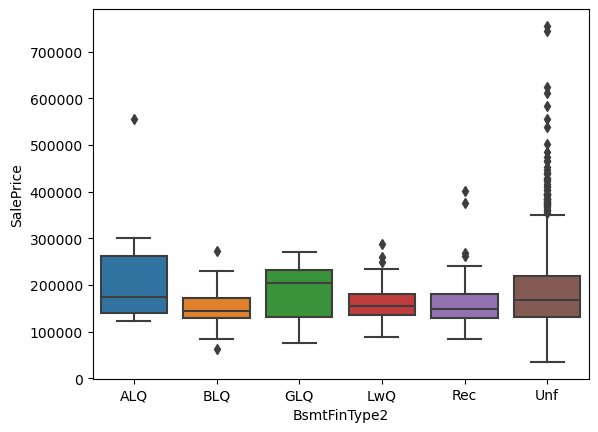

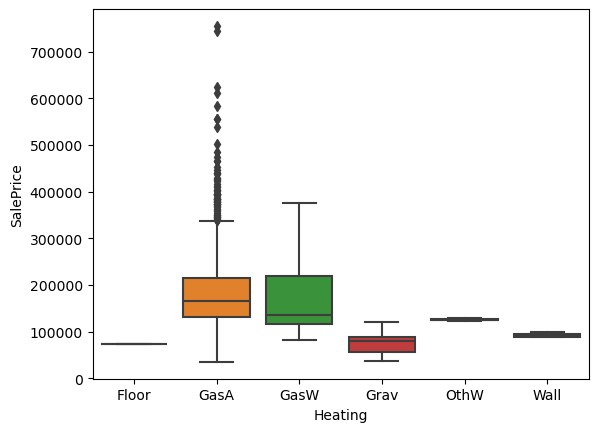

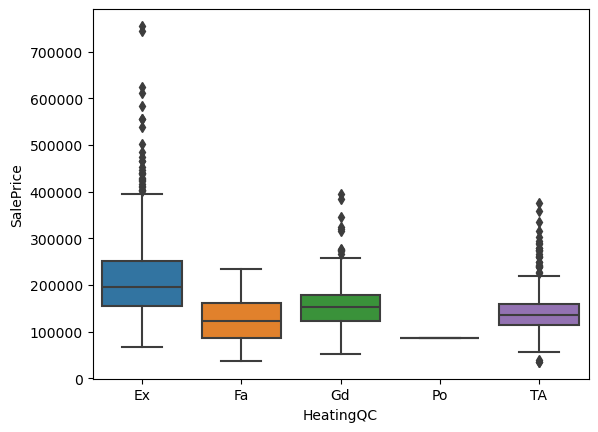

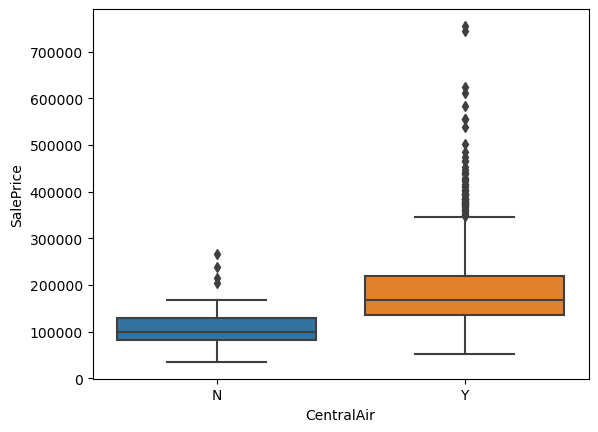

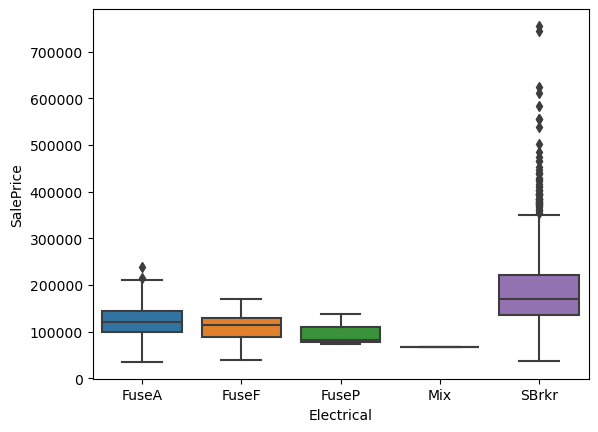

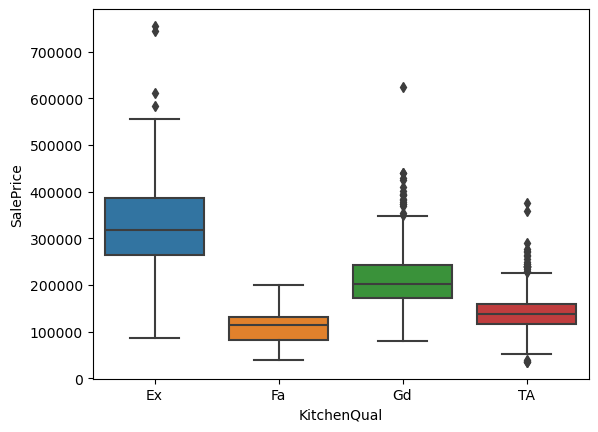

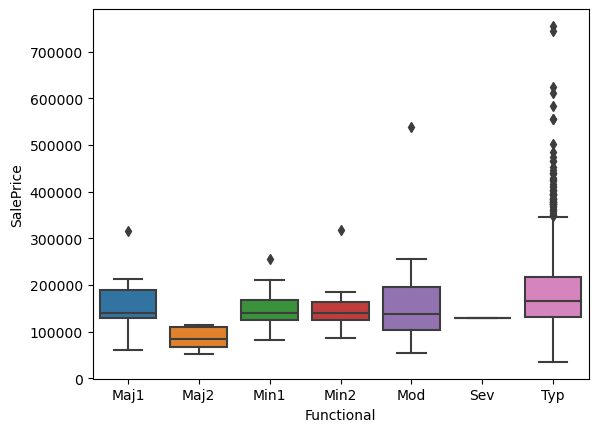

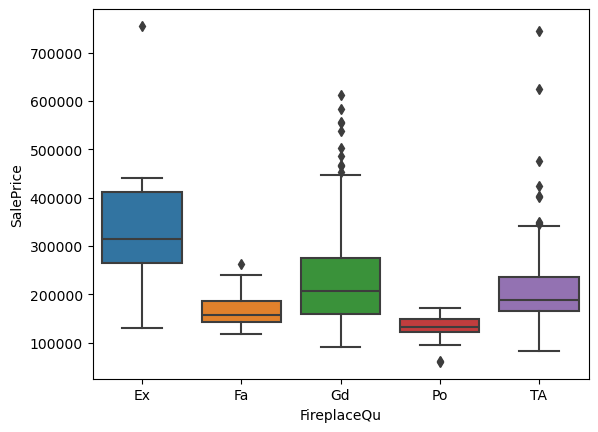

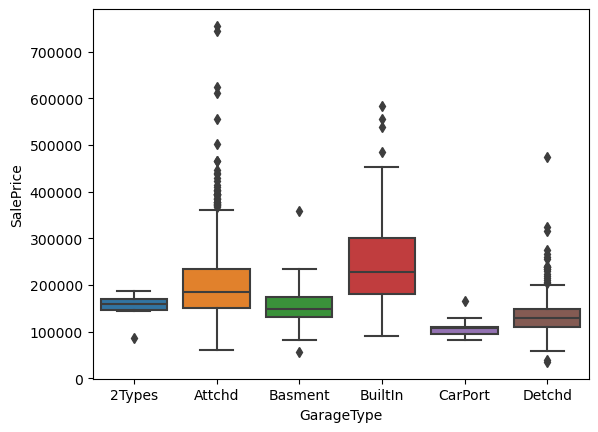

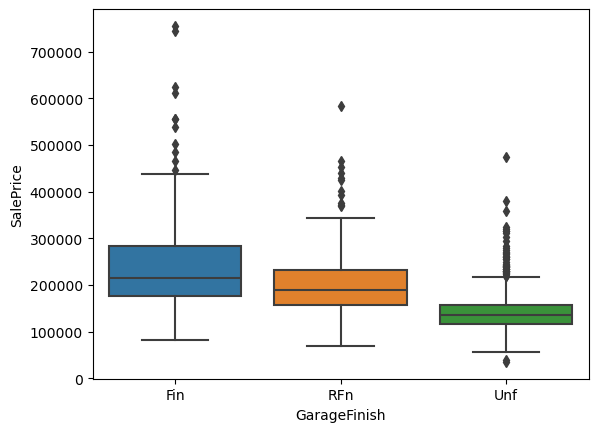

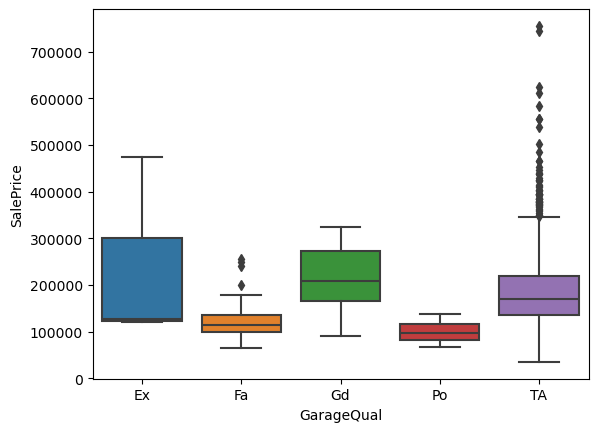

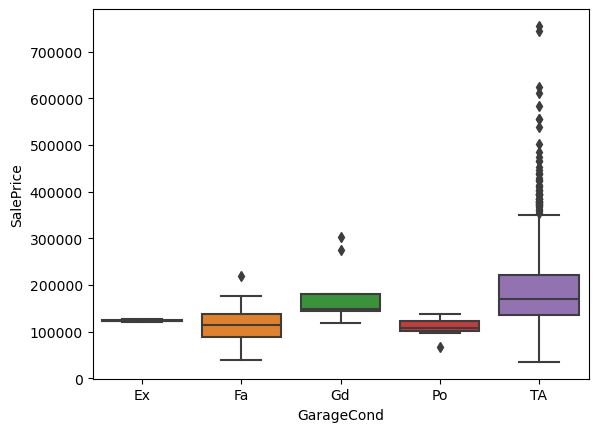

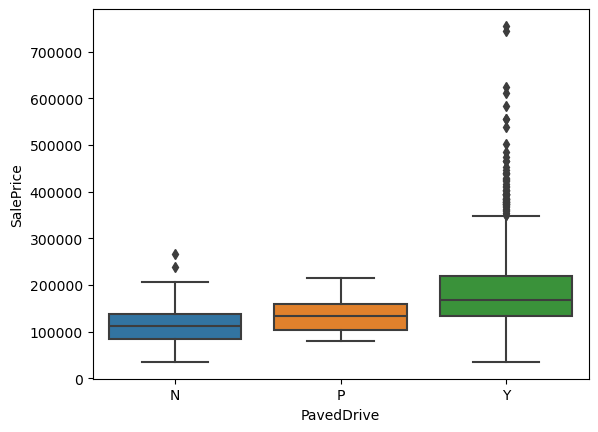

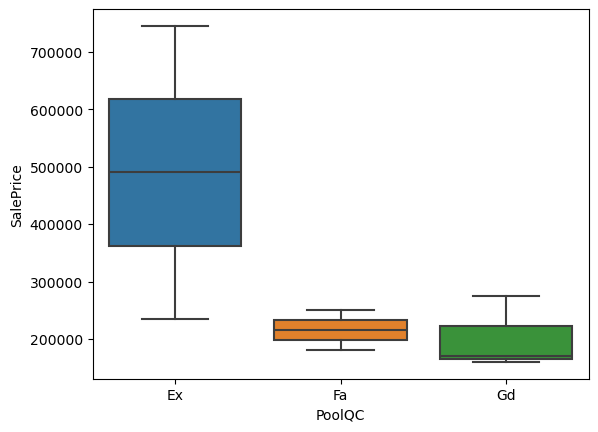

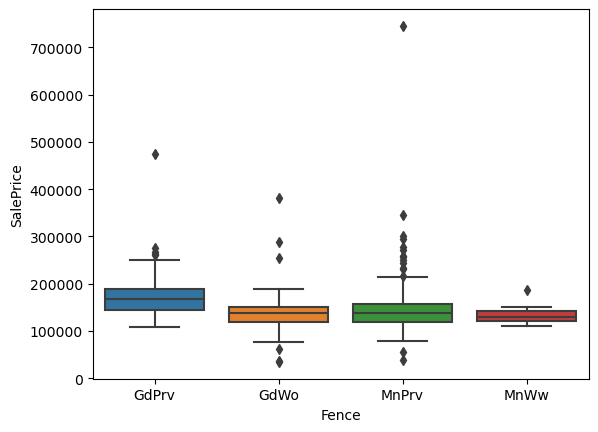

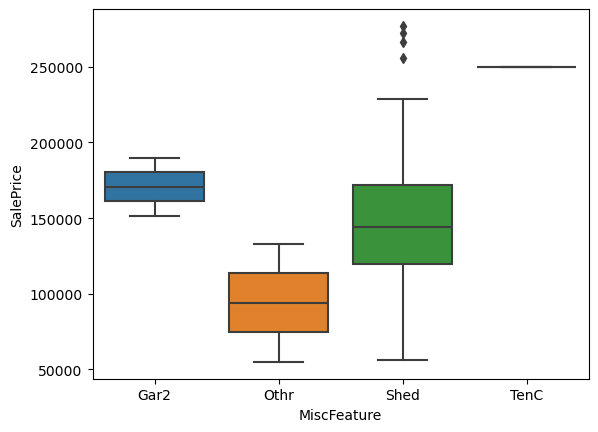

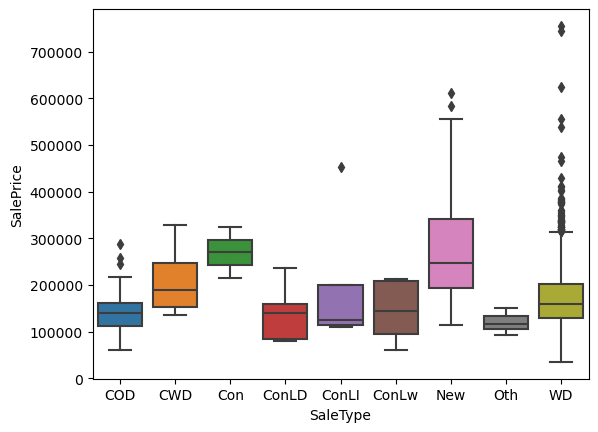

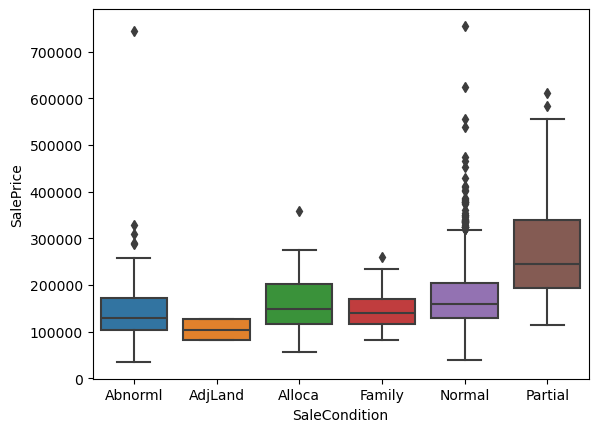

In [31]:
#Explore categorical features vs target relationships
for feature in cat_selector(house_train):
    sns.boxplot(x=feature, y='SalePrice', data=house_train)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


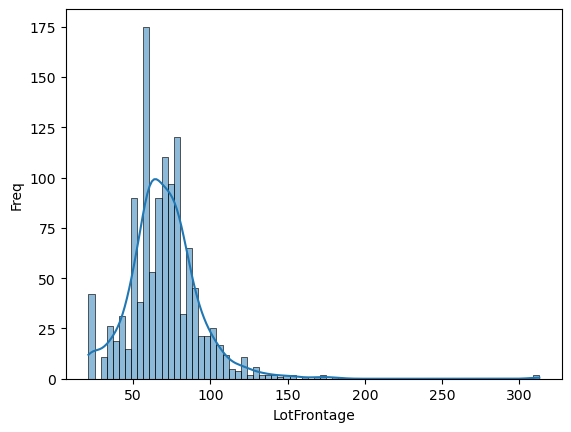

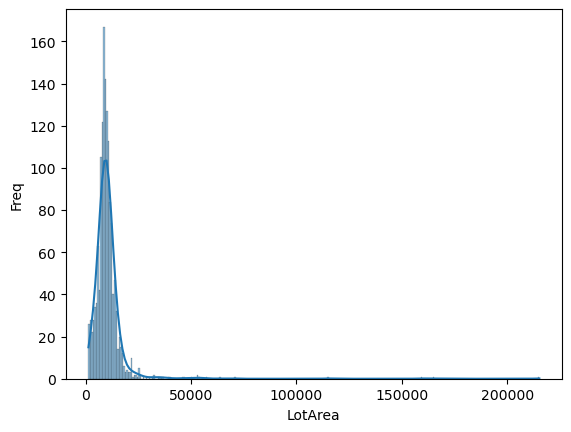

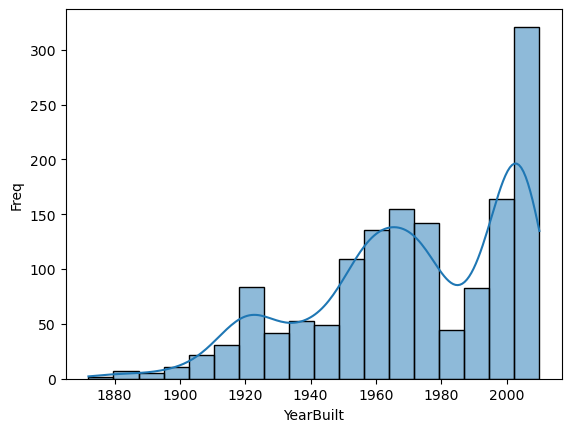

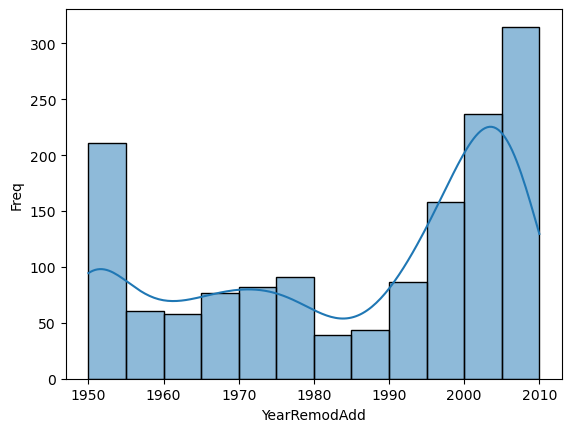

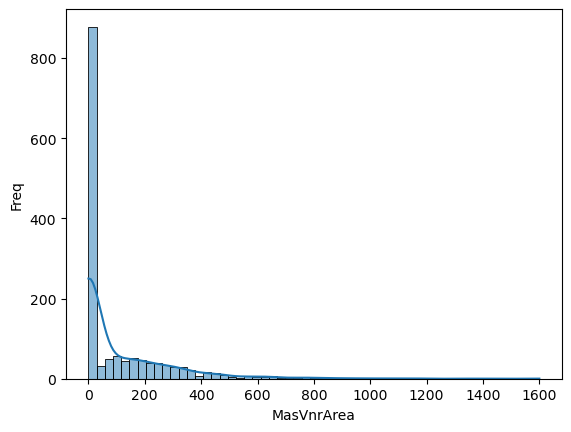

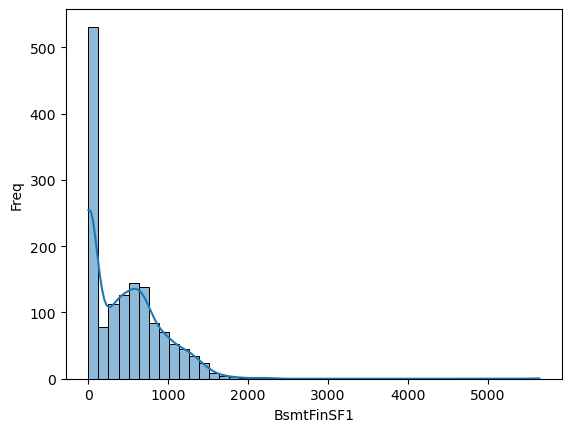

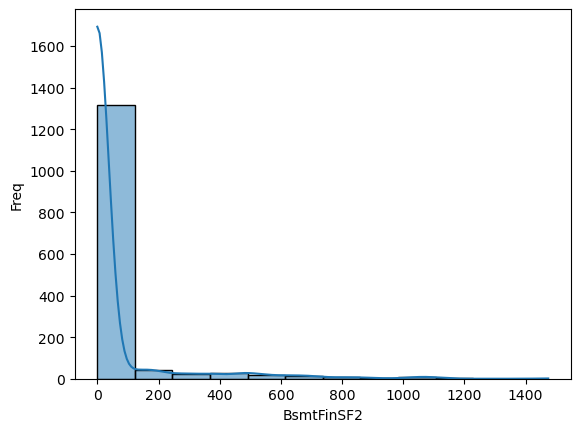

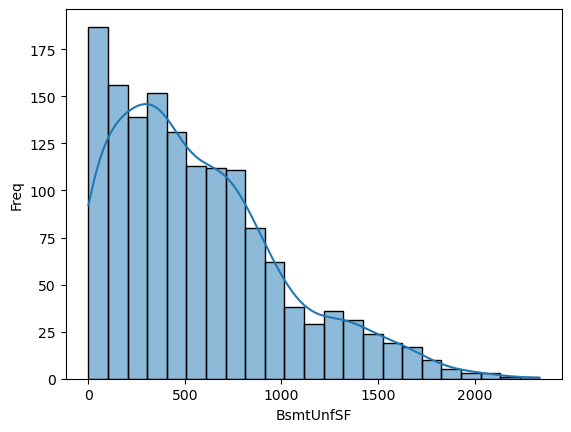

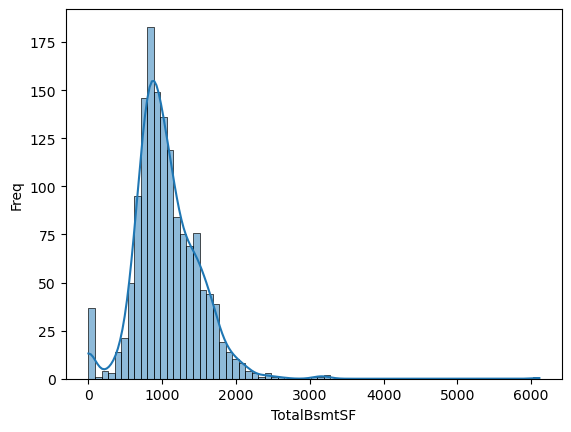

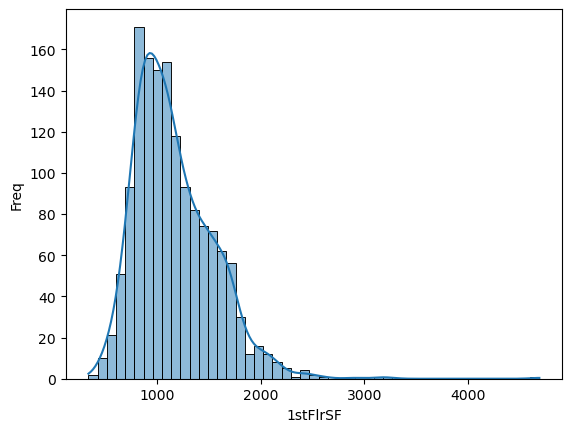

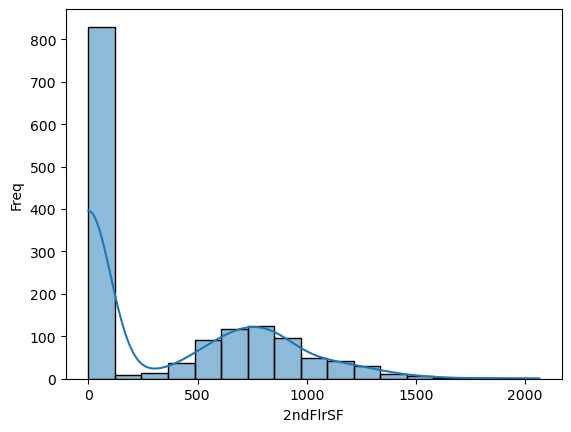

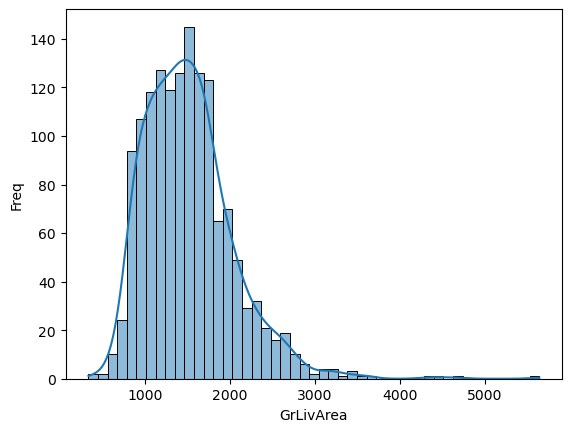

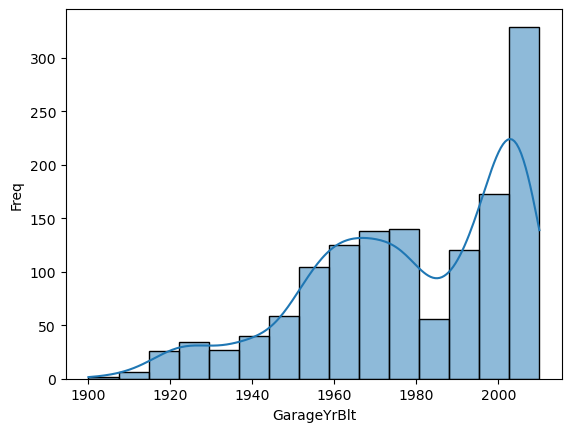

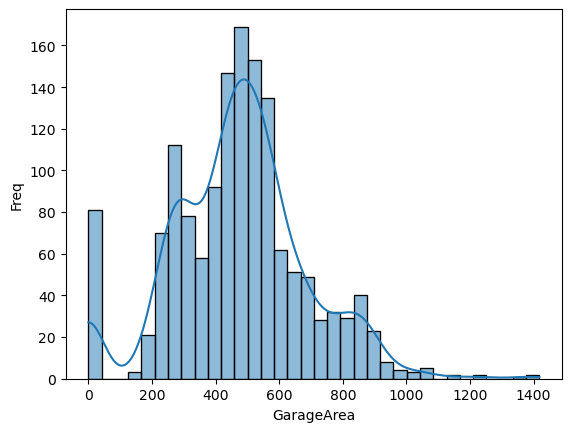

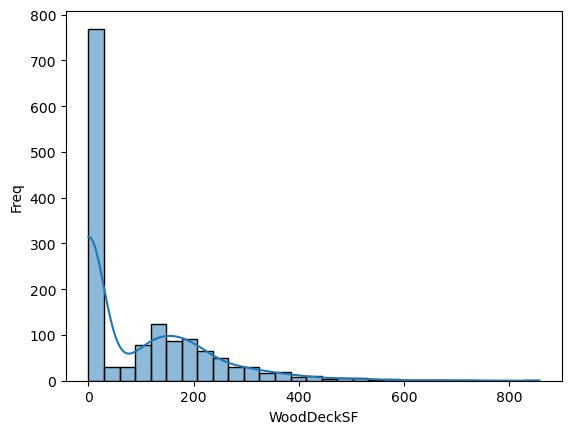

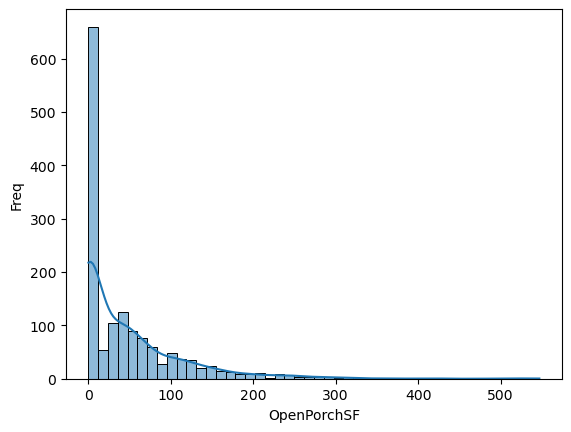

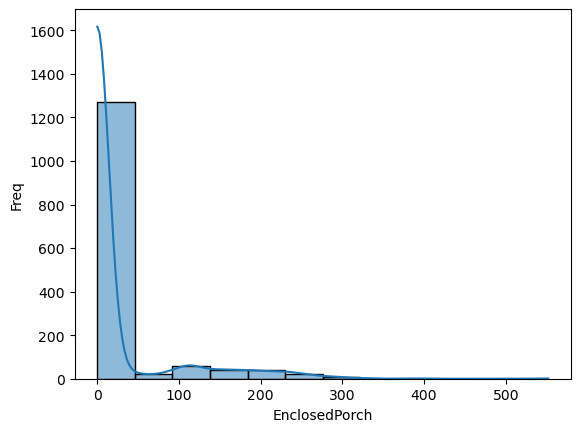

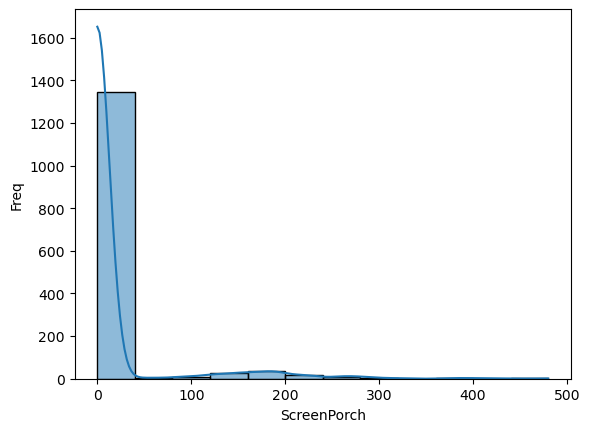

In [33]:
#Explore continuous features
cont_dist_features=[]
for feature in cont_selector(house_train):
    if len(house_train[feature].unique()) > 25 and feature not in ['Id', 'SalePrice']:
        cont_dist_features.append(feature)
print(cont_dist_features)

for feature in cont_dist_features:
    sns.histplot(house_train[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Freq')
    plt.show()

In [34]:
#Explore continuous features vs target relationships
df_cont_features = house_train[cont_selector(house_train)]
print(df_cont_features.shape)
corr = df_cont_features.corr()
corr

(1460, 37)


Id  LotFrontage   LotArea  OverallQual  OverallCond  \
Id             1.000000    -0.010601 -0.033226    -0.028365     0.012609   
LotFrontage   -0.010601     1.000000  0.426095     0.251646    -0.059213   
LotArea       -0.033226     0.426095  1.000000     0.105806    -0.005636   
OverallQual   -0.028365     0.251646  0.105806     1.000000    -0.091932   
OverallCond    0.012609    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998     0.088866  0.013788     0.550684     0.073741   
MasVnrArea    -0.050298     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1    -0.005024     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230     0.038469  0.004779    -0.030429     0.025494   
GrLivArea      0.008273     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155    -0.007234  0.048046    -0.040150     0.117821   
FullBath       0.005587     0.198769  0.126031     0.550600    -0.194149   
HalfBath       0.006784     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239     0.352096  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt    0.000072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars     0.016570     0.285691  0.154871     0.600671    -0.185758   
GarageArea     0.017634     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635     0.070029  0.020423     0.030371     0.025504   
ScreenPorch    0.001330     0.041383  0.043160     0.064886     0.054811   
PoolArea       0.057044     0.206167  0.077672     0.065166    -0.001985   
MiscVal       -0.006242     0.003368  0.038068    -0.031406     0.068777   
MoSold         0.021172     0.011200  0.001205     0.070815    -0.003511   
YrSold         0.000712     0.007450 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id             -0.012713     -0.021998   -0.050298   -0.005024   -0.005968   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.344501    0.445863    0.097117   
2ndFlrSF        0.010308      0.140024  

In [35]:
def plot_corr_heatmap(corr):
    mask = np.triu(corr)
    plt.figure(figsize=(50, 50))
    heatmap = sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', linewidths=1, mask=mask, cbar=True)
    heatmap.set_title('Correlation Heatmap', fontsize=40)
    heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 25, rotation=0)
    heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 25, rotation=70)
    plt.show()

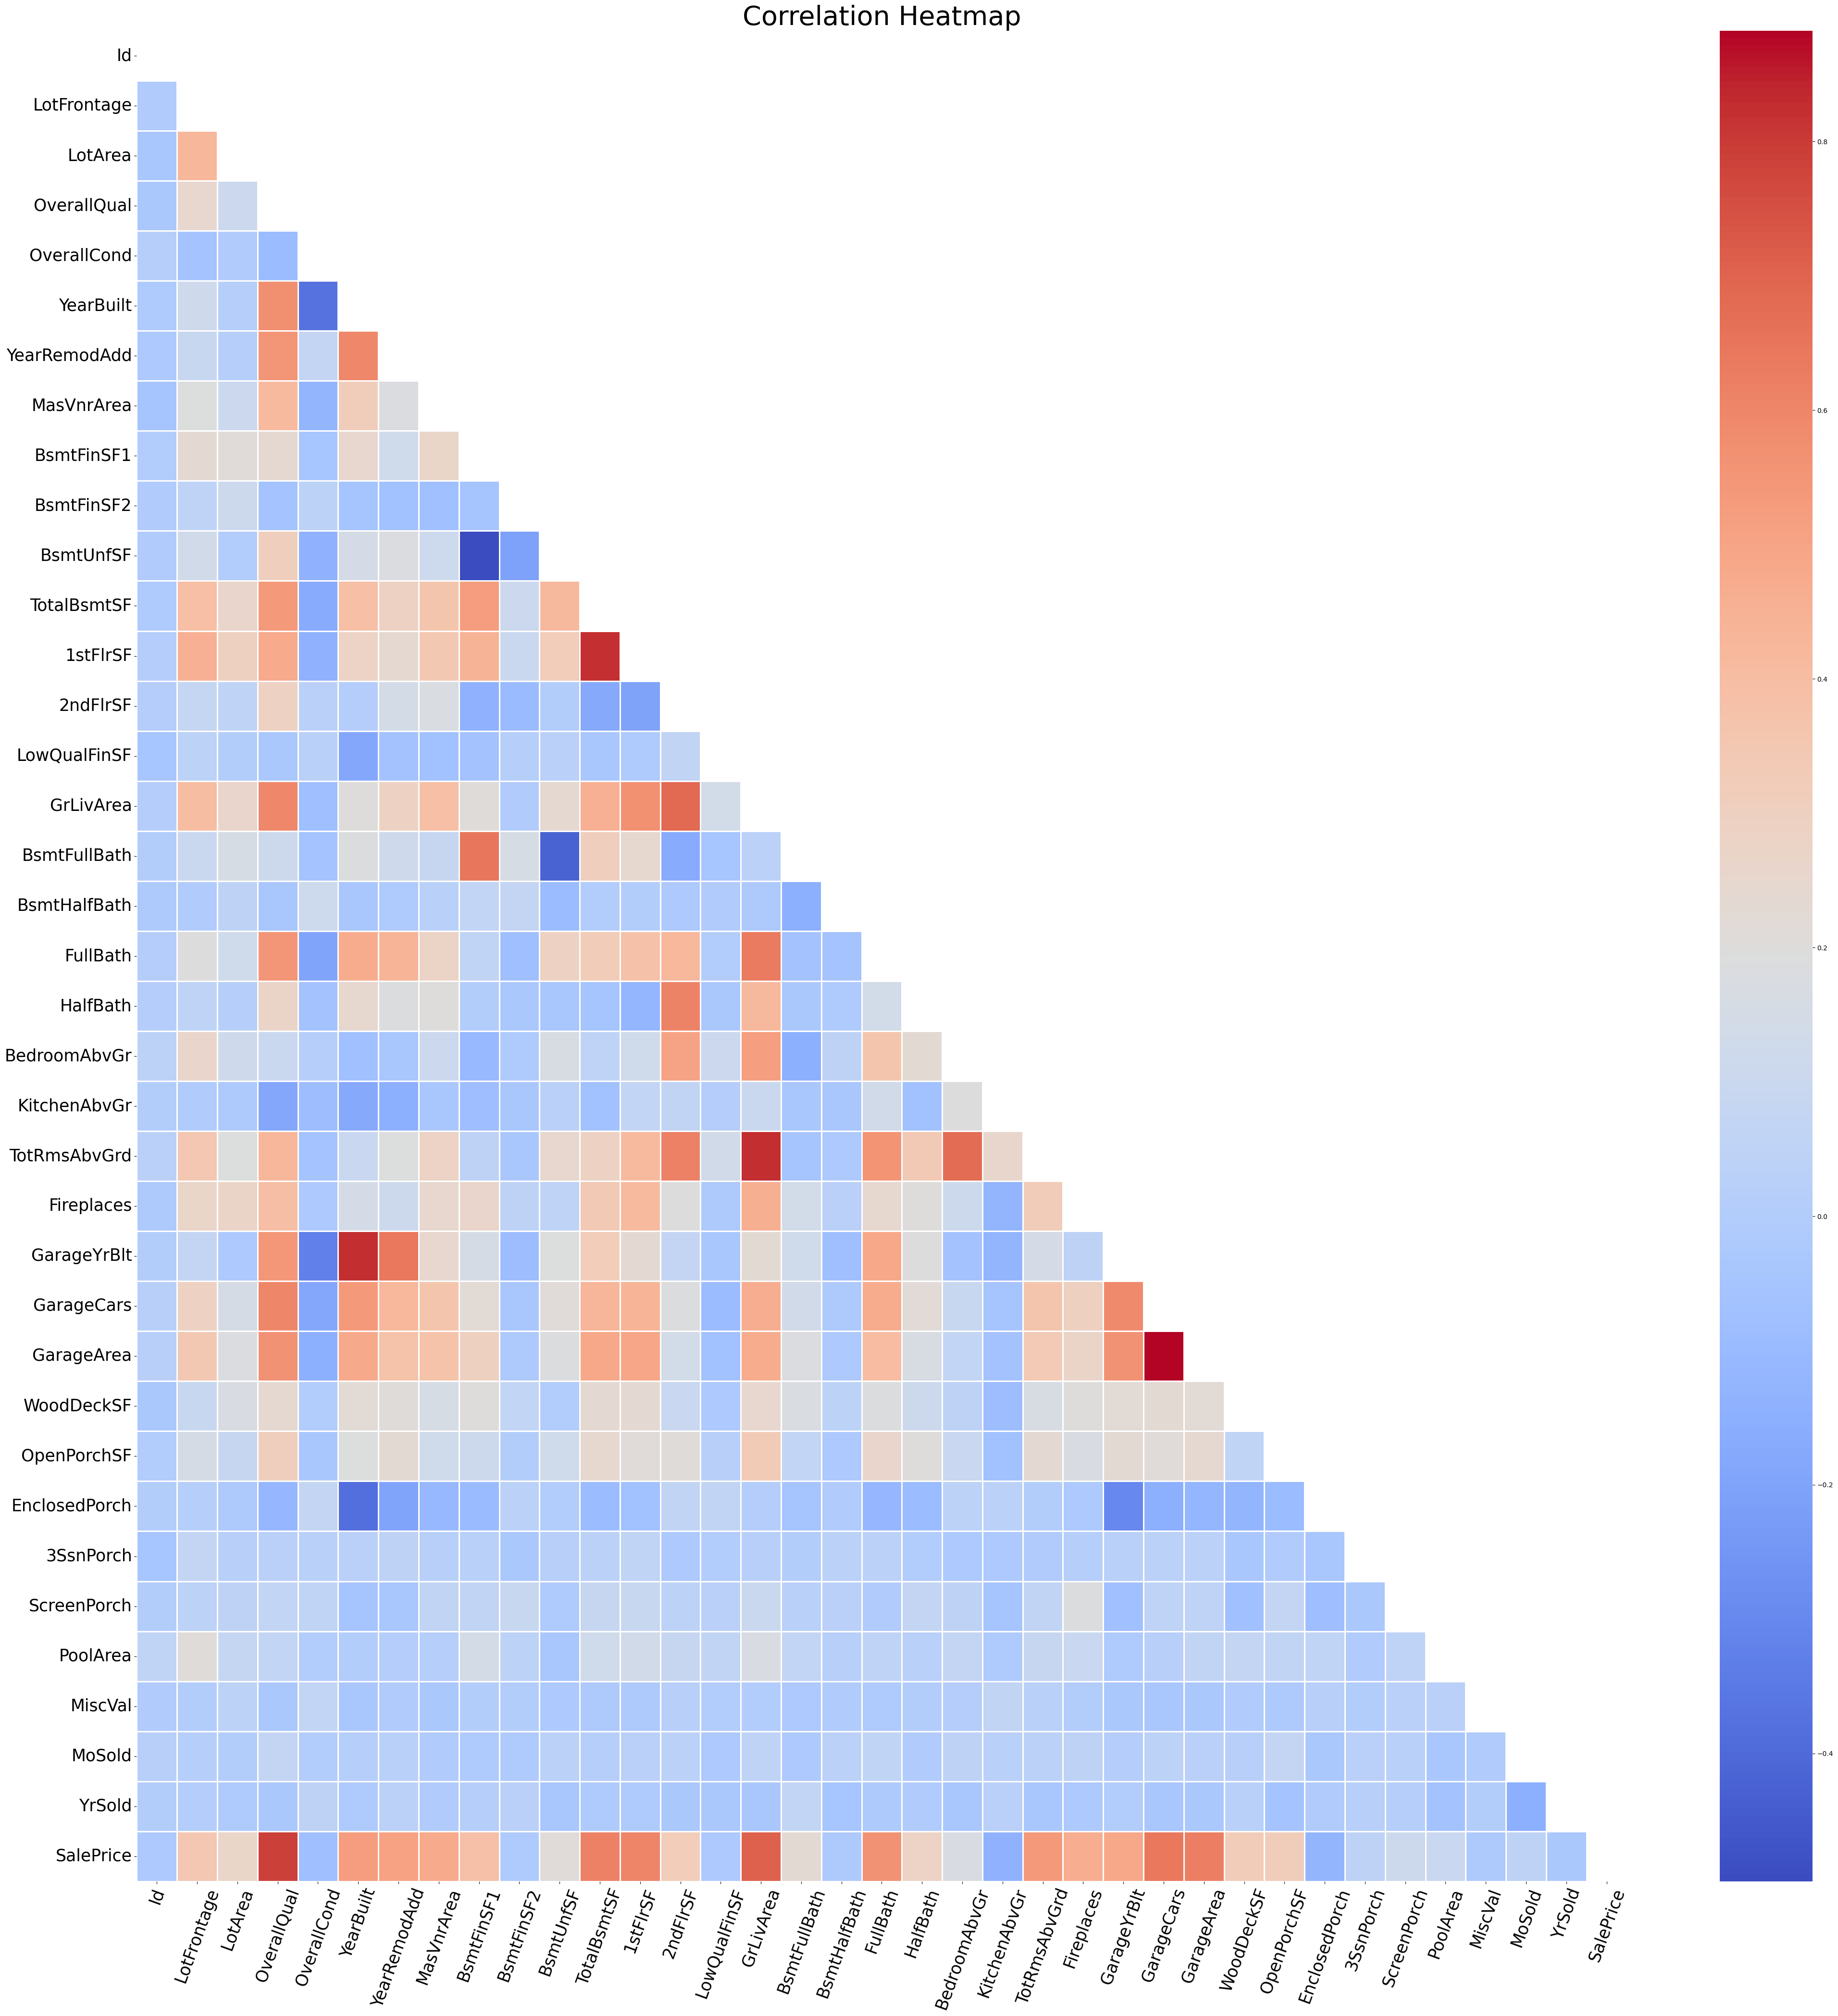

In [36]:
plot_corr_heatmap(corr)

In [37]:
df = corr.nlargest(corr.shape[1], 'SalePrice')['SalePrice']
df.head(corr.shape[1])

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

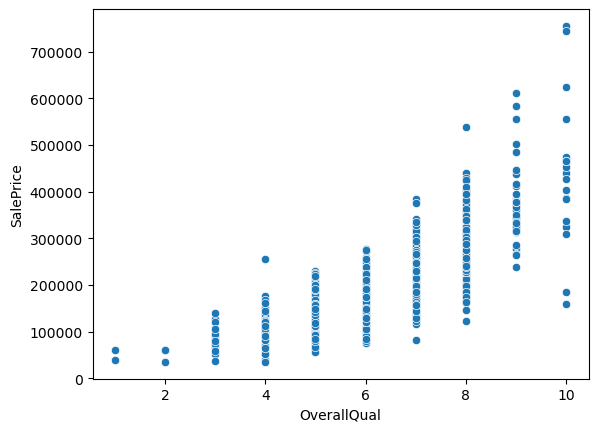

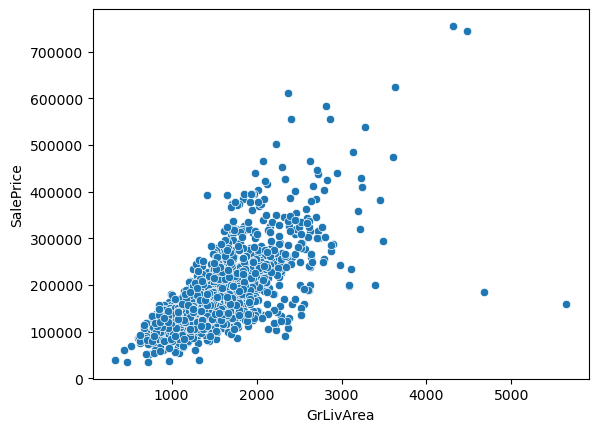

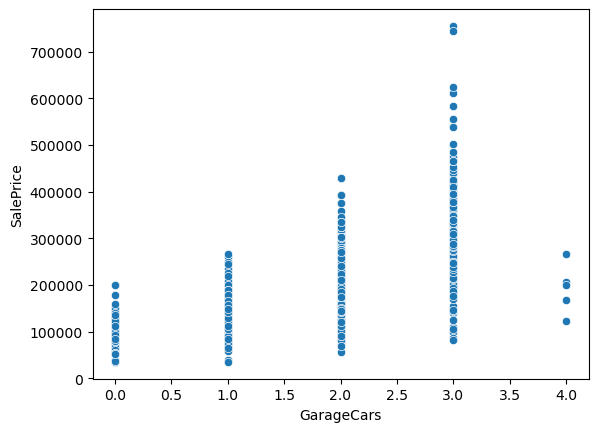

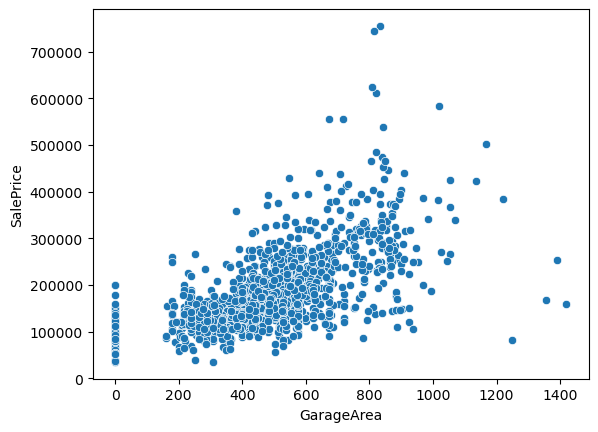

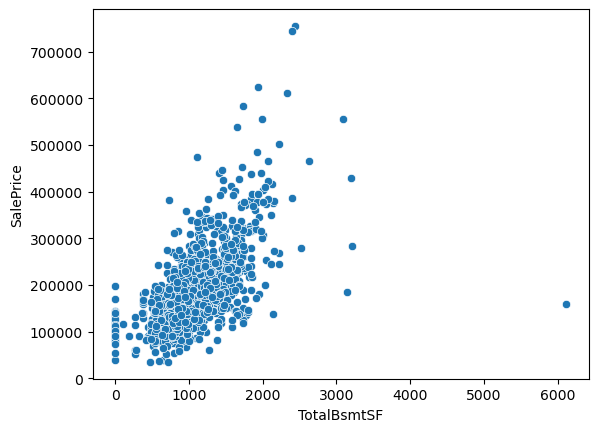

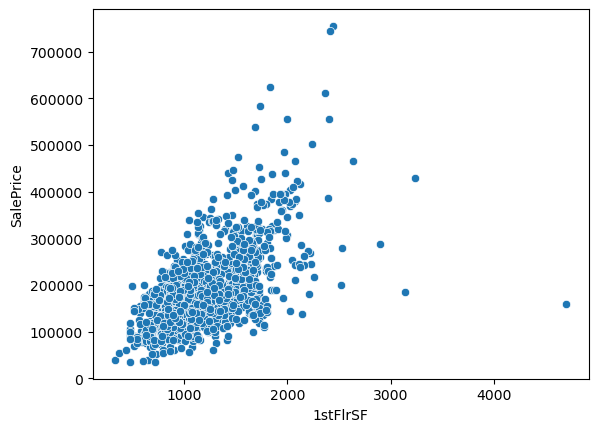

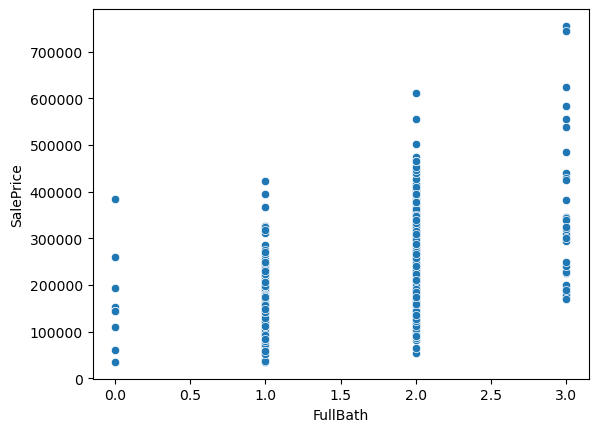

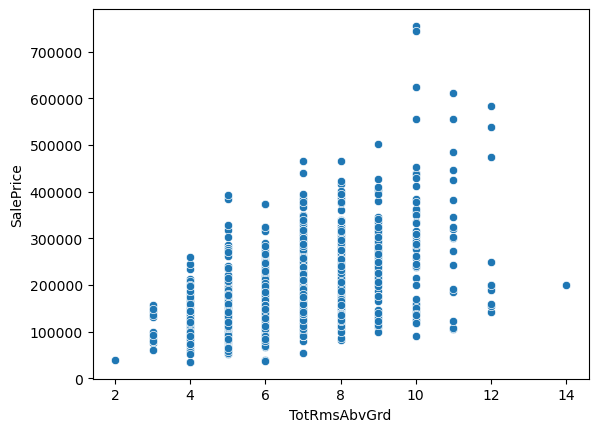

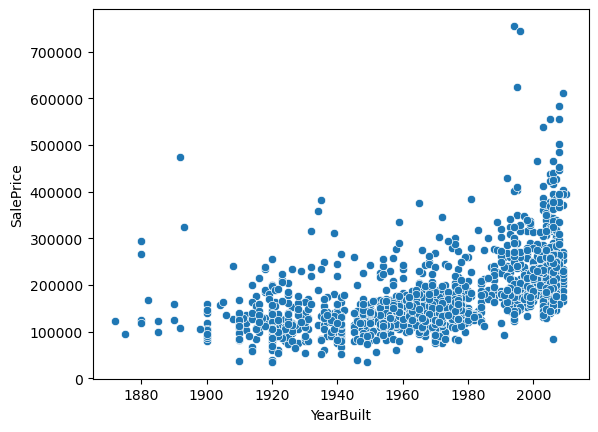

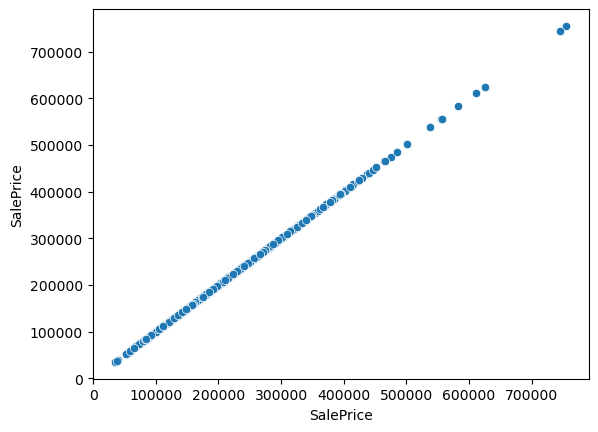

In [38]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice']
for feature in cols:
    sns.scatterplot(x=feature, y='SalePrice', data=house_train)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [40]:
#feature creation
house_train['TotalSF'] = house_train['TotalBsmtSF'] + house_train['GrLivArea'] + house_train['1stFlrSF'] + house_train['2ndFlrSF']
house_train['TotalBathRooms'] = house_train['FullBath'] + house_train['BsmtFullBath'] + 0.5 * house_train['HalfBath'] +  0.5 * house_train['BsmtHalfBath']
house_train['TotalPorchSF'] = house_train['OpenPorchSF'] + house_train['3SsnPorch'] + house_train['EnclosedPorch'] + house_train['ScreenPorch']

In [42]:
df_cont_features = house_train[cont_selector(house_train)]
corr = df_cont_features.corr()
df = corr.nlargest(corr.shape[1], 'SalePrice')['SalePrice']
df.head(corr.shape[1])

SalePrice         1.000000
OverallQual       0.790982
TotalSF           0.777123
GrLivArea         0.708624
GarageCars        0.640409
TotalBathRooms    0.631731
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
GarageYrBlt       0.486362
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.351799
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
TotalPorchSF      0.195739
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
O

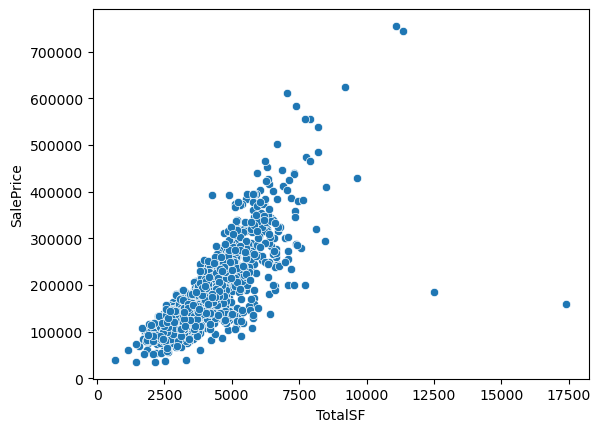

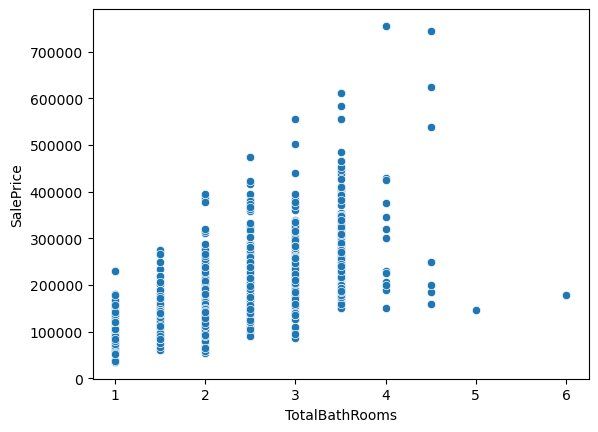

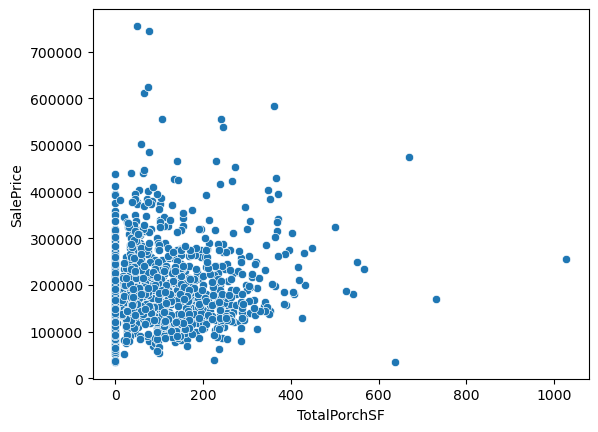

In [43]:
cols = ['TotalSF', 'TotalBathRooms', 'TotalPorchSF']
for feature in cols:
    sns.scatterplot(x=feature, y='SalePrice', data=house_train)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()